# Материалы:
* Презентация: (https://drive.google.com/file/d/1QJVI2HAuSXRHrl3lL7q8jhZrUqrcbpDc/view?usp=share_link)
* Дашборд: (https://public.tableau.com/views/_16752682631960/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

# Анализ оттока клиентов «Метанпромбанк»
***Цель исследования:*** на основе данных о финансовом положении клиентов, их социально-географическом статусе и характере взаимотношений с банком выделить сегменты клиентов, склонных к уходу.

***Описание исходных данных:*** датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
- `userid` — уникальный идентификатор пользователя,
- `score` — баллы кредитного рейтинга НБКИ,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте, руб.,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта: 0 - нет, 1 - да,
- `Loyalty` — активный клиент: 0 - нет, 1 - да,
- `estimated_salary` — заработная плата клиента, оцененная  по модельным расчетам, руб.,
- `Churn` — ушёл или нет: 0- нет, 1 - да.

***Шаги исследования:***

1. Загрузка данных и знакомство с ними.
2. Предобработка данных. 
    - Исследование и обработка названий столбцов 
    - Исследование и обработка дубликатов
    - Исследование и обработка пропусков
    - Исследование и обработка аномалий
    - Кодирование данных
3. Исследовательский анализ данных.
    - Анализ рейтинга клиентов
    - Анализ местоположения клиентов
    - Анализ поло-возрастных характеристик клиентов
    - Анализ финансового положения клиентов (баланс, заработная плата, объекты в собственности)
    - Анализ характера взаимоотношений клиентов с банком (продукты, кредитные карты, активность)
    - Анализ оттока в разрезе комбинации ключевых признаков
    - Корреляционный анализ (выявление факторов, наиболее тесно связанных с уходом и между собой)
    - Портреты клиентов в разрезе городов, финансового положени, пола и возраста
4. Проверка статистических гипотез.
    - Гипотеза о равенстве среднего дохода между теми клиентами, которые ушли и теми, которые остались
    - Гипотеза о равенстве среднего количества используемых продуктов между ушедшими и оставшимися клиентами (возможна корректировка в ходе дальнейшего анализа)
5. Сегментация пользователей, выявление сегментов, склонных к уходу.
6. Общий вывод и рекомендации.

## Загрузка данных и знакомство с ними

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np # для математических вычислений
from numpy import median
import math as mth # набор функций для выполнения математических, тригонометрических и логарифмических операций
import scipy.stats as st # для статистических вычислений
from scipy.stats import skew, mode
import datetime as dt # для обработки времени и дат
from datetime import datetime, timedelta
import matplotlib.pyplot as plt # для визуализации двумерной графикой
import seaborn as sns # для создания статистических графиков
from plotly import graph_objects as go # интерактивные графики
import plotly.express as px
import re # модкль для работы с регулярными выражениями
from itertools import * # для комбинаторных задач

In [2]:
# загрузка данных в переменные
df = pd.read_csv('C:/Users/meria/Documents/Portfolio/Datasets/bank_dataset.csv')

In [3]:
# знакомство с данными
display(df.head())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


- Датасет состоит из 10000 строк и 12 колонок; 
- Названия колонок требуются привести к нижнему регистру, что будет сделано в предобработке; 
- Типы данных для всех колонок указаны верно;
- В колонке с балансом на счете 36% значений пропущено, что много и требует дополнительной оценки причин.

In [5]:
# уникальные значения для всех колонок
df.nunique()

userid              10000
score                 460
City                    3
Gender                  2
Age                    70
Objects                11
Balance              6381
Products                4
CreditCard              2
Loyalty                 2
estimated_salary     9999
Churn                   2
dtype: int64

In [6]:
# список уникальных значений для основных категориальных переменных
for column in df[['City', 'Gender', 'Objects', 'Products', 'CreditCard', 'Loyalty', 'Churn']]:
    print(column, df[column].unique())

City ['Ярославль' 'Рыбинск' 'Ростов Великий']
Gender ['Ж' 'М']
Objects [ 2  1  8  7  4  6  3 10  5  9  0]
Products [1 3 2 4]
CreditCard [1 0]
Loyalty [1 0]
Churn [1 0]


In [7]:
# описательная статистика для данных
df.describe(include = "all")

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.573368e+07,650.528800,NaN,NaN,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,NaN,NaN,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,NaN,NaN,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,NaN,NaN,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,NaN,NaN,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000


- все пользователи уникальны по id;
- минимальная представленная ценка кредитного рейтинга - 350, максимальная - 850, большая часть рейтингов уникальна и относится к среднему или высокому уровню. Доступный диапазон в шкале кредитного рейтинга от 1 до 999, где по данным НБКИ (https://nbki.ru/poleznaya-informatsiya/kak-ocenit-personalnyy-kreditnyy-reyting/):
        - 1 - 149 баллов - низкое качество кредитоспособности, 
        - 150 - 593 баллов – среднее качество кредитоспособности,
        - 594 - 903 баллов – высокое качество кредитоспособности,
        - 904 до 999 баллов – очень высокое качество кредитоспособности.
- около 50% данных содержат информацию по Ярославлю, остальные 50% - по Рыбинску и Ростову Великому. Такая пропорция не отражает реальное соотношение населения в этих городах.
- мужчины и женщины представлены в данных примернов  равном объеме с незначительным преобладанием мужчин (54,5%);
- клиенты в возрасте от 18 до 92, средний возраст - 39 лет, а 50% клиентов находятся в возрасте от 32 до 44 лет. 
- объектов в пользовании от 0 до 10 со средним показателем 5, что много, если речь идет об объектах недвижимости (точной информации в описании к данным не представлено);
- баланс счета по присутствующим данным попадает в диапазон от 3 до 250 тыс, 50% клиентов имеют баланс от 100 до 140 тыс. В описании к данным не указано о балансе каких счетов идет речь,  но т.к. максимальная сумма невелика, скорее всего это не общая сумма средств клиента и не депозитные счета.
- количество продуктов у клиетов от 1 до 4, с меньшей долей тех, кто имеет больше 1 продукта.
- 71% клиентов имеет кредитную карту.
- 52% клиентов активны.
- 20% клиентов в выборке - ушедшие.
- предполагаемый уровень зарплаты от 11 до 200 тыс. рублей, причем клиенты распределены по квантилям практически равномерно. 

In [8]:
# создание копии исходного датафрейма
df_orig = df.copy()

***Выводы:***
- Датасет состоит из 10000 строк уникальных по id клиентов и 12 колонок. Круглое число строк свидетельствует скорее об определенной выборке клиентов, а не полной их базе;
- описание данных и имеющаяся информация не содержат указания на временной период, к которому относятся данные;
- все клиенты относятся к среднему или высокому кредитному рейтингу;
- пропорциональная представленность численности клиентов по городам не соответствует численности населения в городах;
- средний клиент - это мужчина или женщина 39-летнего возраста с 5 объектами в собственности, с балансом на счете около 120 тыс. и зарплатой около 100 тыс. рублей, использующий 1 продукт банка, которым скорее всего является кредитная карта. 
- только 52% клиентов активны и 20% уже покинули банк. 
- требуется приведение названий к нижнему регистру;
- типы данных указаны верно;
- 36% информации о балансе счета отсутствует.

## Предобработка данных

### Исследование и обработка названий столбцов

Приведение названий к нижнему регистру, необходимость чего была установлена при знакомстве с данными.

In [9]:
# изменение регистра заголовка
df.columns = df.columns.str.lower()

### Исследование и обработка дубликатов

In [10]:
# проверка на наличие явных дубликатов
print('Явные дубликаты, шт:', df[df.duplicated()].shape[0])

Явные дубликаты, шт: 0


In [11]:
# проверка наличия неявных дубликатов в данных при исключении столбцов с id, балансом и зарплатой
df[df[['score', 'city', 'gender', 'age', 'objects', 'products','creditcard', 'loyalty']].duplicated(keep=False)].sort_values(by=['city', 'gender', 'age', 'score'])

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
131,15761105,795,Ростов Великий,Ж,33,9,130862.43,1,1,1,114935.21,0
9960,15723762,795,Ростов Великий,Ж,33,9,104552.72,1,1,1,120853.83,1
3484,15686415,784,Ростов Великий,М,28,2,70233.74,2,1,1,179252.73,0
8990,15771801,784,Ростов Великий,М,28,2,109960.06,2,1,1,170829.87,0
4397,15786214,659,Ростов Великий,М,39,8,52106.33,2,1,1,107964.36,0
6973,15626130,659,Ростов Великий,М,39,8,106259.63,2,1,1,198103.32,0
5411,15856376,642,Ярославль,Ж,40,7,NaN,2,1,0,10712.82,0
7899,15726296,642,Ярославль,Ж,40,7,NaN,2,1,0,183963.34,0
2693,15670433,662,Ярославль,М,34,2,NaN,2,0,1,21497.27,0
9578,15853627,662,Ярославль,М,34,2,117731.79,2,0,1,55120.79,0


При проверке на неявные дубликаты наблюдается подозрительная закономерность: строго парные клиенты по социально-географическим характеристиками и взаимоотношениям с банком. Однако оснований считать их дубликатами и корректировать недостаточно. 

In [12]:
# проверка наличия неявных дубликатов по балансу
df[df['balance'].duplicated(keep=False) & df['balance']>0].sort_values(by=['city', 'gender', 'age', 'score'])

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
927,15676197,639,Ростов Великий,М,38,5,130170.82,1,1,1,149599.62,0
4961,15675257,689,Ростов Великий,М,45,0,130170.82,2,1,0,150856.38,0
9714,15724010,726,Рыбинск,Ж,56,2,105473.74,1,1,1,46044.70,0
9127,15686223,630,Рыбинск,М,39,10,105473.74,1,0,0,58854.88,1


In [13]:
# проверка наличия неявных дубликатов по зарплате
df[df['estimated_salary'].duplicated(keep=False) & df['estimated_salary']>0].sort_values(by=['city', 'gender', 'age', 'score'])

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
3176,15655750,722,Ростов Великий,М,29,1,107233.85,2,1,0,24924.92,0
3620,15806542,773,Ярославль,М,41,4,NaN,2,1,1,24924.92,0


Найдены отдельные случаи совпдаения баланса счета (2 шт) и предполагаемой зарплаты (1 шт), которые по остальным параметрам не являются дубликатами. 

***Промежуточный вывод:*** дубликаты в данных отсутствуют.

### Исследование и обработка пропусков

In [14]:
# доля пропусков
print('Доля пропусков:', df['balance'].isnull().sum()/df.shape[0]*100, '%')

Доля пропусков: 36.17 %


Доля пропусков значительна. Для удобства дальнейшего анализа выделим факт заполненности баланса в отельный признак.

In [15]:
# создание столбца с бинарным признаком заполненности баланса
df['balance_NaN'] = np.where(df['balance'].isnull(), 1,0)

In [16]:
# оцениваем среднее по доступным показателям в зависимости от наличия информации о балансе
df.groupby(df['balance'].isnull()).mean().style.background_gradient(cmap = 'Blues', axis=0)

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_NaN
balance,,,,,,,,,,,
False,15733104.798997,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796,0
True,15734685.585292,649.452861,38.434891,5.071330,nan,1.784628,0.716616,0.517832,98983.559549,0.138236,1


Среди клиентов, по которым отсуствует информация о балансе, меньше доля ушедших клиентов (13% против 24%) и большее количество продуктов (среднее 1,8 против 1,4). Остальные показатели существенно не отличаются. Посмотрим как представлены признаки в разрезе наличия или отстусвия данных по балансу.

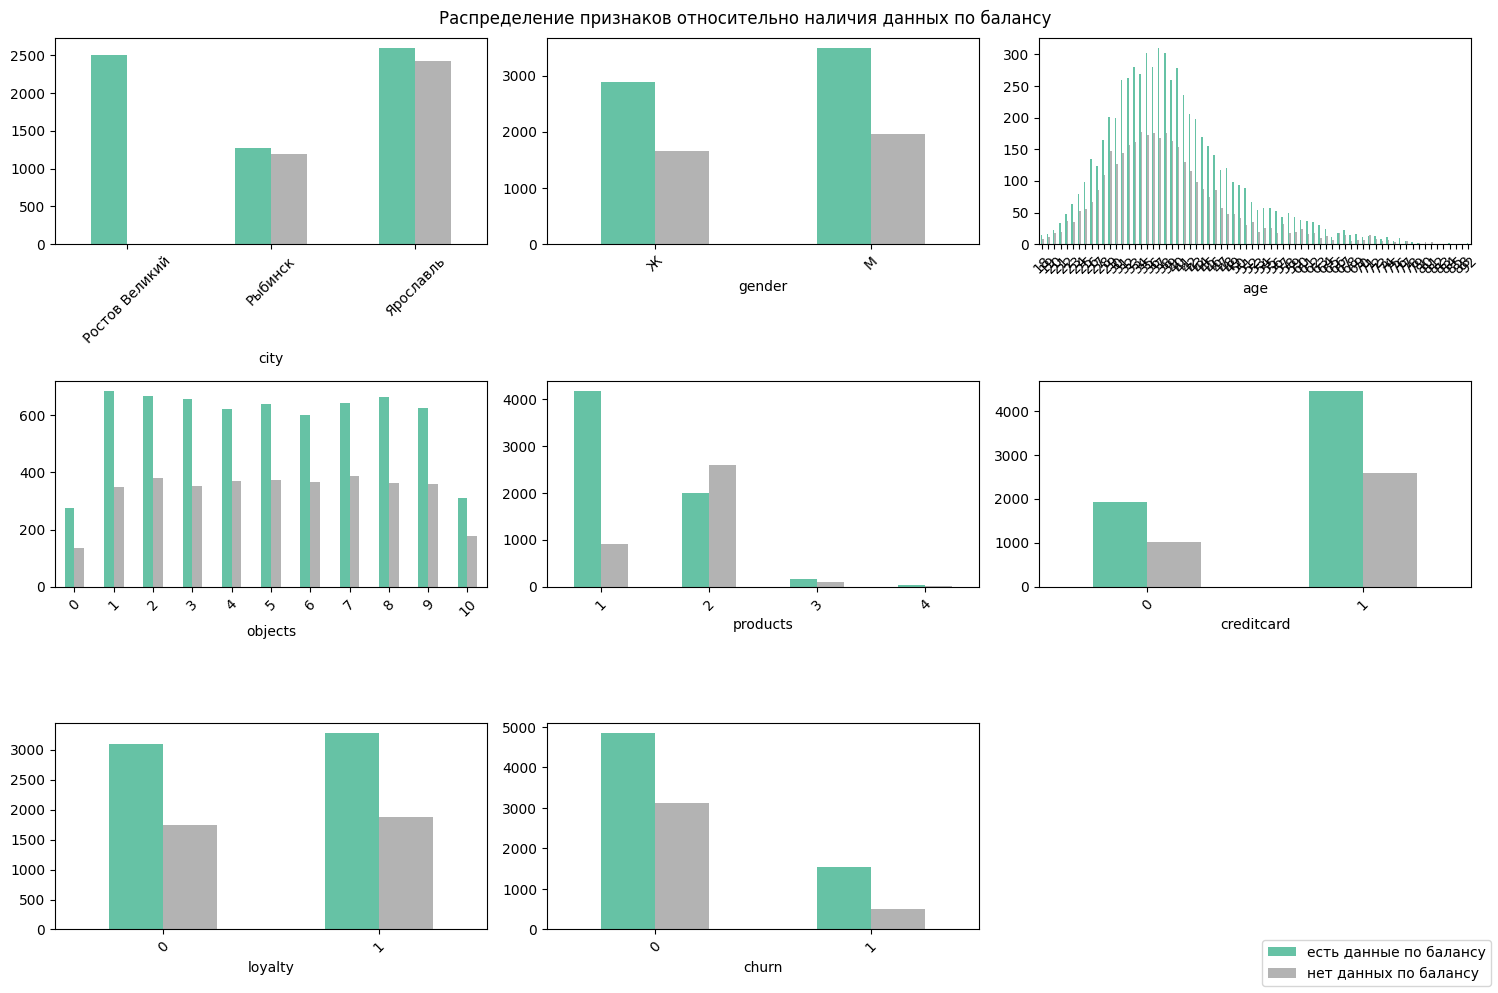

In [17]:
# список признаков
list = ['city', 'gender', 'age', 'objects', 'products', 'creditcard', 'loyalty', 'churn']

fig = plt.figure(figsize=(15, 10))
fig.suptitle('Распределение признаков относительно наличия данных по балансу')
# перебор признаков и построение графиков
for i in list:
    x=list.index(i)+1
    ax = fig.add_subplot(3, 3, x)
    df.pivot_table(index=i, columns='balance_NaN', values='userid', aggfunc='count')\
    .plot(kind='bar', rot=45, legend=False, colormap='Set2', ax=ax)

fig.legend(['есть данные по балансу', 'нет данных по балансу'], loc='lower right' ) 
plt.tight_layout();

Данные по балансу отсутсвуют только в Ярославле и Рыбинске, в Ростове Великом попусков нет. Примечательно, что среди пользователей 2-х продуктов доля пропусков превосходит, долю заполненных значений, что не характерно для иного количества продуктов.  

In [18]:
# оцениваем среднее по доступным показателям в зависимости от наличия информации о балансе  
# для выборки данных, для которых характерно отсутствие данных о балансе 
df[(df['city']!='Ростов Великий') & (df['products']==2)].groupby(df['balance'].isnull()).mean()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_NaN
balance,,,,,,,,,,,
False,1.573701e+07,654.898947,37.991579,4.894737,120010.930989,2.0,0.672632,0.518947,103883.231558,0.143158,0
True,1.573426e+07,651.456538,37.461154,5.120000,NaN,2.0,0.714615,0.532692,99046.280369,0.033077,1


In [19]:
# описательная статистика для данных, для которых характерно отсутствие данных о балансе 
df[(df['city']!='Ростов Великий') & (df['products']==2) & (df['balance'].isnull()==True)].describe(include = "all")

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_NaN
count,2.600000e+03,2600.000000,2600,2600,2600.000000,2600.000000,0.0,2600.0,2600.000000,2600.000000,2600.000000,2600.000000,2600.0
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1739,1439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.573426e+07,651.456538,NaN,NaN,37.461154,5.120000,NaN,2.0,0.714615,0.532692,99046.280369,0.033077,1.0
std,7.168447e+04,95.675704,NaN,NaN,10.254741,2.843254,NaN,0.0,0.451684,0.499026,58399.470330,0.178872,0.0
min,1.560854e+07,408.000000,NaN,NaN,18.000000,0.000000,NaN,2.0,0.000000,0.000000,90.070000,0.000000,1.0
25%,1.567300e+07,584.000000,NaN,NaN,31.000000,3.000000,NaN,2.0,0.000000,0.000000,48474.425000,0.000000,1.0
50%,1.573559e+07,652.000000,NaN,NaN,36.000000,5.000000,NaN,2.0,1.000000,1.000000,99193.865000,0.000000,1.0
75%,1.579569e+07,718.000000,NaN,NaN,42.000000,8.000000,NaN,2.0,1.000000,1.000000,149428.260000,0.000000,1.0


***Промежуточный вывод:***

Определен срез данных, для которого характерно преобладание отсутствия данных о балансе - это клиенты в городах Рыбинск и Ярославль, имеющие 2 продукта. Для этого среза не наблюдается существенного отклонения всех прочих показателей, за исключением доли ушедших клиентов - они прктически отсутствуют (3%). Отсутствие явных закономерностей и искажений не позволяет корректно заполнить пропуски. Заполнение средним или медианным значением может исказить результаты дальнейшего анализа, а замена на ноль исказить статпоказатели, поэтому пропуски оставлены без изменений, а для дополнительного анализа будет использована ранее созданная колонка 'balance_NaN'.

### Исследование и обработка аномалий

Посмотрим на наличие клиентов, которые одновременно имеют статус активных и ушедших.

In [20]:
# статистика по клиентам, ушедшим, но тем не менее имеющим статус активных
df[(df['loyalty']==1) & (df['churn']==1)].describe(include = 'all')

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_NaN
count,7.350000e+02,735.000000,735,735,735.000000,735.000000,555.000000,735.000000,735.000000,735.0,735.000000,735.0,735.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,Ж,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,298,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.573329e+07,645.247619,NaN,NaN,44.763265,4.789116,120938.140198,1.534694,0.655782,1.0,100654.022367,1.0,0.244898
std,7.389166e+04,97.869686,NaN,NaN,9.879437,2.936270,30940.590168,0.847231,0.475436,0.0,57903.233747,0.0,0.430320
min,1.560844e+07,350.000000,NaN,NaN,18.000000,0.000000,23503.310000,1.000000,0.000000,1.0,11.580000,1.0,0.000000
25%,1.566810e+07,581.000000,NaN,NaN,38.000000,2.000000,104656.770000,1.000000,0.000000,1.0,50543.215000,1.0,0.000000
50%,1.573209e+07,644.000000,NaN,NaN,45.000000,5.000000,120961.500000,1.000000,1.000000,1.0,102517.830000,1.0,0.000000
75%,1.579976e+07,715.500000,NaN,NaN,51.000000,7.000000,137357.105000,2.000000,1.000000,1.0,150677.920000,1.0,0.000000


735 записи одновременно имеют статус ушедших и активных. При этом данные их описательной статистики существенно не отличаются от выборки в целом.  Количество записей значимо, а т.к. методика присвоения стауса активности не предоставлена в описании к данным, допустим возможность, что активность определяется на основе наличия любых действий клиента за неустановленный период времени, к которым не относится написание заявления на прекращение отношений с банком. И несмотря на логическую противоречивость, уход не ведет к автоматическому смену статуса активности на 0.  

При первом знакомстве с данными обратил на себя внимание минимальный уровень предполагаемой заработной платы  в 11 рублей. Посмотрим на распределение оценок зарплаты подробнее. 

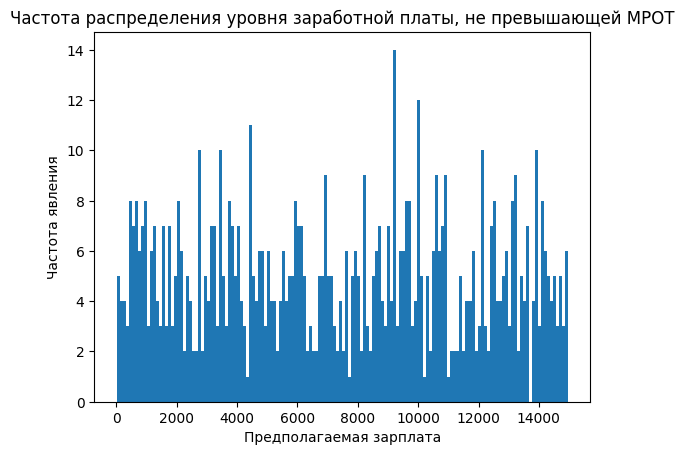

In [21]:
# распредление зарплаты, непревышающей условный МРОТ (15 279 рублей в 2022 году)
df[df['estimated_salary']<15000]['estimated_salary'].hist(bins=150, grid=False)
plt.title('Частота распределения уровня заработной платы, не превышающей МРОТ')
plt.xlabel('Предполагаемая зарплата')
plt.ylabel('Частота явления');

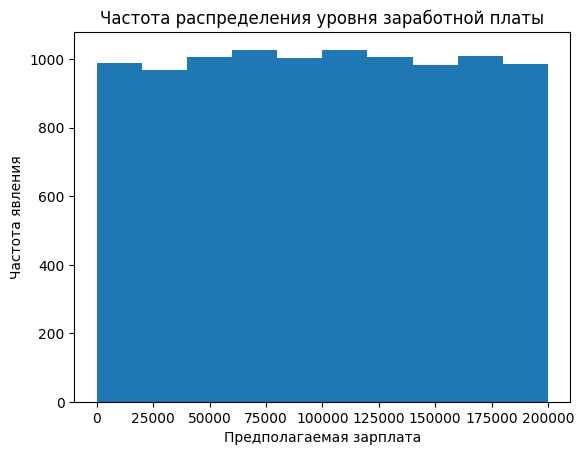

In [22]:
# распредление зарплаты
df['estimated_salary'].hist(grid=False)
plt.title('Частота распределения уровня заработной платы')
plt.xlabel('Предполагаемая зарплата')
plt.ylabel('Частота явления');

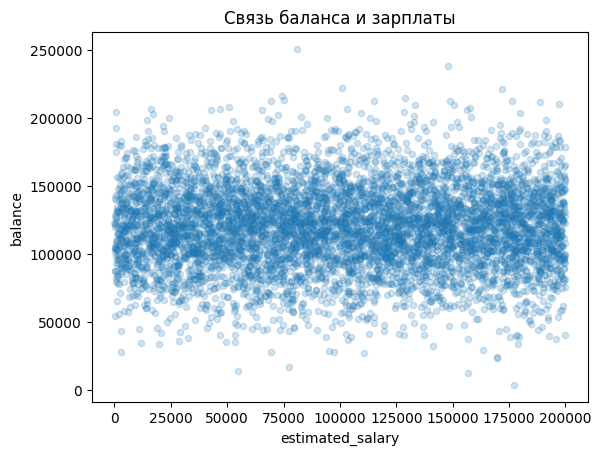

In [23]:
# связь баланса и зарплаты,для оценки возможности корректировки данных о зарплате на основе данных о балансе
df.plot(x='estimated_salary', y='balance', kind='scatter', alpha=0.2, title='Связь баланса и зарплаты');

Частотность появления всех уровней зарплаты, начиная с минимального, в диапазоне оклада от 1 руб до 15 тыс. примерно одинакова, как и в случае с равномерным распредлением оцененного оклада в остальных диапазонах. Такая картина не отражает реальное распредление окладов среди населения и средний уровень зарплаты, который вдвое меньше представленного (https://76.ru/text/economics/2022/12/04/71865587/), и ставит под сомнение качество данных о признаке. Однако, имеющейся информации недостаточно для корректной замены или исключения части данных даже в случае аномально низких сумм, т.к. возможны реальные случаи появления сумм, существенно меньших МРОТ, при, например, неполной занятости, больничных и т.д.. 

Для оценки выбросов применим метод z-оценки, который показывает, сколько стандартных отклонений исследуемого значения от среднего. 

In [24]:
# находим абсолютное значение z-score для каждого наблюдения
z = np.abs(st.zscore(df[['score', 'age', 'objects', 'balance', 'products', 'estimated_salary']]))

# сохраняйте только строки со всеми z-оценками меньше абсолютного значения 3
df_clean = df[(z<3).all(axis=1)]

# определяем как много строк содержат выбросы
df_clean.shape

(0, 13)

***Промежуточный вывод:***

в ходе анализа выявлено:
- данные по заработной плате нереалистично равномерно распредлены, но информации для их корректировки недостаточно;
- данные о статусах активности и уходе не связаны по логике присвоения;
- данные не содержат выбросы по методике z-оценки.


### Кодирование данных

Категориальные данные необходимо закодировать в числа, прежде чем использовать их в моделях.

Одним из наиболее используемых методов работы с категориальными признаками является подход называемым One Hot Encoding. Основная стратегия состоит в том, чтобы преобразовать значение каждой категории в новую колонку и присваивает значение 1 или 0 (True / False) значение для столбца. Закодируем номинальные категориальные признаки "city" и "gender". Также закодируем порядковые признаки "object" и "products", чтобы анализировать отдельные значения призака. 

In [25]:
# создаем дубликаты столбцов для их дальнейшего кодирования
df['city2'] = df['city']
df['gender2'] = df['gender']
df['objects2'] = df['objects']
df['products2'] = df['products']

In [26]:
# кодируем категориальные столбцы
df = pd.get_dummies(df, columns=['city2', 'gender2', 'objects2', 'products2'],\
                    prefix=['city', 'gen', 'obj', 'prd'])

In [27]:
# переименовываем столбцы под более удобный формат
df = df.rename(columns={'city_Ростов Великий' : 'city_rstv','city_Ростов Великий' : 'city_rstv', \
                        'city_Рыбинск' : 'city_rbnk', 'city_Ярославль' : 'city_yrlv',\
                        'gen_Ж' : 'gen_w', 'gen_М' : 'gen_m'})

In [28]:
# количество столбцов после кодирования
df.columns.shape

(33,)

In [29]:
# создание столбцов со смысловым значением для бинарных показателей
df['creditcard_t'] = np.where(df['creditcard']==1, 'есть карта','нет карты')
df['loyalty_t'] = np.where(df['loyalty']==1, 'акт.', 'не акт.')
df['churn_t'] = np.where(df['churn']==1, 'ушел', 'не ушел')

In [30]:
# количество столбцов после добавления новых
df.columns.shape

(36,)

***Промежуточный вывод:*** в результате кодировки катеогриальных переменных количество столбцов увеличилось с исходных 12 до 33. 

***Вывод:***

В результате предобработки данных:
- названия столбцы приведены к нижнему регистру;
- не выявлено явных или неявных дубликатов;
- определена доля пропусков в данных о балансе = 36% и признаки с наибольшим количеством пропусков по балансу:
        - чаще пропуски встречаются у клиентов, имеющих 2 продукта;
        - в Ростове пропуски отсутствуют;
        - среди ушедших доля пропусков меньше, а если они к тому же являются пользователями 2-х продуктов, то доля пропусков составляет только 3%. 
- замена пропусков не производилась;
- установлен аномальный характер распределения заработной платы;
- подтверждено отсутствие существенных выбросов в данных;
- произведено кодирование категориальных переменных в результате чего количество столбцов увеличилось с 12 до 33, а добавление столбцов со смысловым значением для бинарных признаков увеличило их до 36.

## Исследовательский анализ данных

### Анализ рейтинга клиентов

Для удобства визуального анализа категоризируем рейтинг по методики НБКИ (https://nbki.ru/poleznaya-informatsiya/kak-ocenit-personalnyy-kreditnyy-reyting/): 
- 1-149 - низкий;
- 150-593 - средний;
- 594-903 - высокий;
- 904-999 - очень высокий.

Такая классификация с одной стороны недостаточно детализирует имеющиеся данные, т.к. в датасете представлено только 2 катеогрии из 4-х, с другой стороны, она общепринята, т.е. используется банком и предположительно определяет характер взаимоотношений банка с клиентом. 

In [31]:
# функция категоризации рейтинга
def score_cat(row):
    if row['score'] < 150:
        return 'низкий'
    elif row['score'] >= 150 and row['score'] <= 593:
        return 'средний'
    elif row['score'] >= 594 and row['score'] <= 903:
        return 'высокий'
    elif row['score'] < 1000:
        return 'очень высокий'
    else:
        return False
df['score_cat'] = df.apply(score_cat, axis=1)

Строим графики распредления для признака.

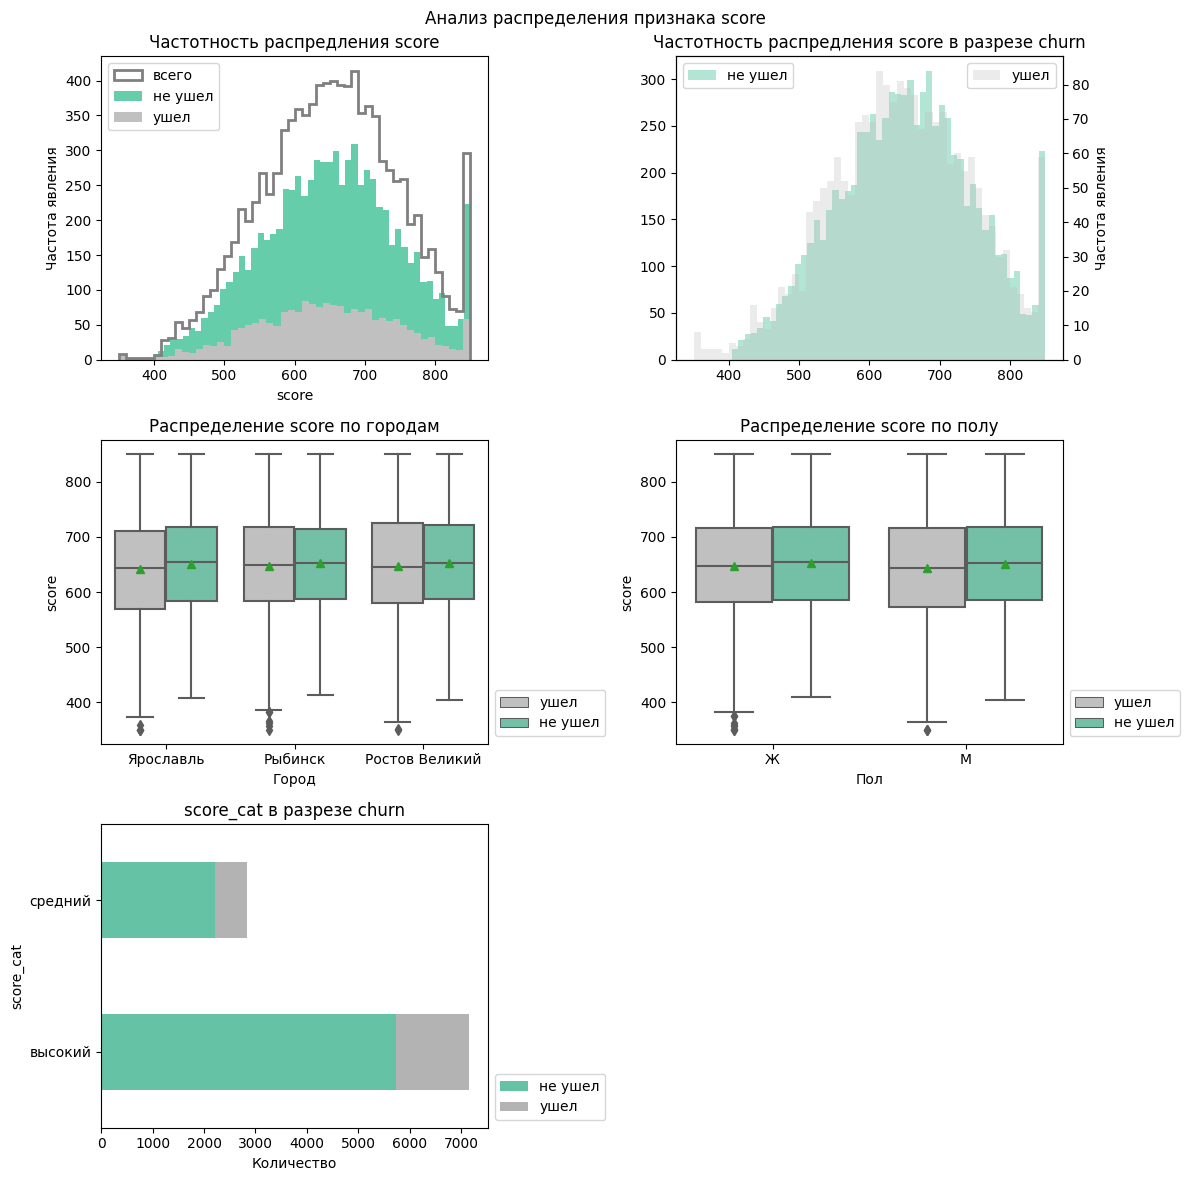

In [32]:
# определяем анализируемый признак
x = 'score'
x1 = 'score_cat'
bins = 50
# определяем полотно графиков
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Анализ распределения признака '+x) # общий заголовок
# график распредления признака
ax = fig.add_subplot(3, 2, 1)
df[x].hist(histtype='step', ls='-', linewidth=2, color='gray', grid=False, bins = bins)
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 1, grid=False, bins = bins)
df[df['churn']==1][x].hist(color='silver', alpha = 1, grid=False, bins = bins)\
.legend(['всего', 'не ушел', 'ушел'], loc='upper left')
plt.title('Частотность распредления '+x)
plt.xlabel(x)
plt.ylabel('Частота явления')

# график распредления признака в разрезе churn
ax = fig.add_subplot(3, 2, 2)
ax1 = ax.twinx()
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 0.5, ax=ax, grid=False, bins = bins)\
.legend(['не ушел'],  bbox_to_anchor=(0, 1), loc='upper left')

df[df['churn']==1][x].hist(ax=ax1, color='silver', alpha = 0.3, grid=False, bins = bins)\
.legend(['ушел'], bbox_to_anchor=(1, 1), loc='upper right')
plt.title('Частотность распредления '+x+' в разрезе churn')
plt.xlabel(x)
plt.ylabel('Частота явления')

# боксплоты в разрезе городов и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 3)
ax = sns.boxplot(x='city', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True)
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по городам')
ax.set_xlabel('Город')

# боксплоты в разрезе пола и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 4)
ax = sns.boxplot(x='gender', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True) 
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по полу')
ax.set_xlabel('Пол')

# количество клиентов с признаком в разрезе категории признака и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 5)
ax = df.pivot_table(index=x1, columns='churn_t', values='userid', aggfunc='count')\
.plot(kind='barh', stacked=True, colormap='Set2', ax=ax)
ax.set_title(x1+' в разрезе churn')
ax.set_xlabel('Количество')
ax.set_ylabel(x1)
ax.legend(bbox_to_anchor=(1, 0.20))

plt.tight_layout();

***Промежуточный вывод:***
- рейтинг клиентов, как ранее было установлена распределяется в диапазоне от 350 до 850, распределение имеет вид нормального отрицательного. Однако наблюдается аномальный пик частостности на уровне 850 баллов;
- среди не ушедших клиентов наблюдается в среднем чуть более высокий рейтинг, чем среди ушедших, но в целом отклонения не значительны.
- только треть клиентов имеет средний рейтинг по классификации Национального бюро кредитных историй, остальные - высокий;
- среди ушедших клиентов наблюдаются выбросы низкого рейтинга, отсутствующие среди оставшихся клиентов;
- в разрезе городов в Ярославле границы 2 и 3 квантиля располагаются на чуть более низком уровне, чем в других городах, но в целом отклонения незначительны;
- существенных отклонений рейтинга в разрезе пола не наблюдается.

### Анализ местоположения клиентов

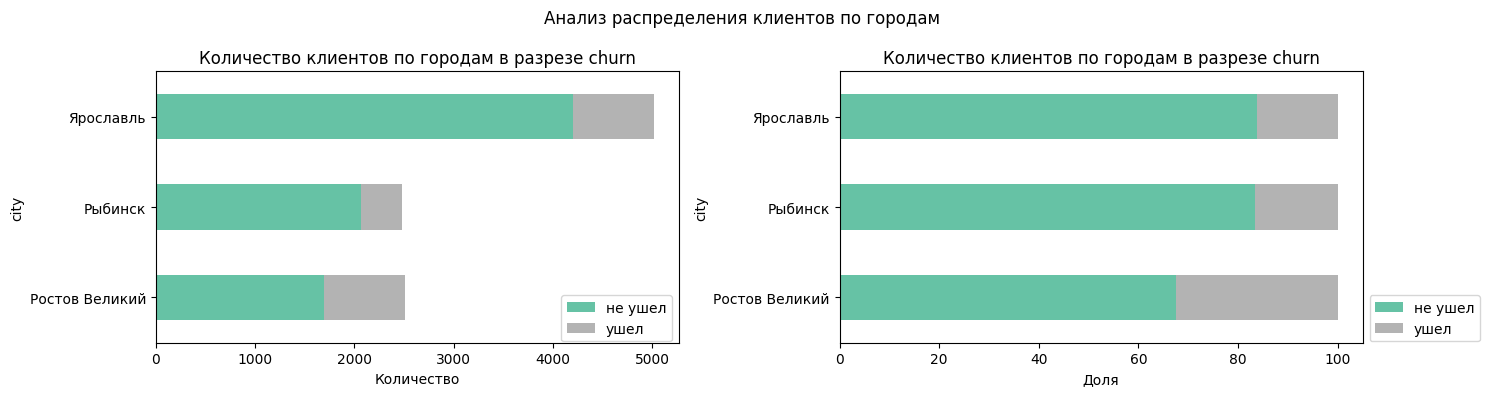

In [33]:
x= 'city'
# определяем полотно графиков
fig = plt.figure(figsize=(15, 4))
fig.suptitle('Анализ распределения клиентов по городам ') # общий заголовок
# график распредления признака

# количество клиентов с признаком в разрезе категории признака и ушедших/не ушедших
ax = fig.add_subplot(1, 2, 1)
df_city = df.pivot_table(index=x, columns='churn', values='userid', aggfunc='count')
df_city = df_city.rename(columns={0:'не ушел', 1:'ушел'})
ax = df_city.plot(kind='barh', stacked=True, colormap='Set2', ax=ax)
ax.set_title('Количество клиентов по городам в разрезе churn')
ax.set_xlabel('Количество')
ax.set_ylabel(x)
ax.legend(bbox_to_anchor=(1, 0.20))

# доли клиентов с признаком в разрезе категории признака и ушедших/не ушедших
ax = fig.add_subplot(1, 2, 2)
df.pivot_table(index=x, columns='churn_t', values='userid', aggfunc='count')\
            .apply(lambda x: x*100/sum(x), axis=1)\
            .plot(kind='barh', stacked=True, colormap='Set2', ax=ax)
ax.set_title('Количество клиентов по городам в разрезе churn')
ax.set_xlabel('Доля')
ax.set_ylabel(x)
ax.legend(bbox_to_anchor=(1, 0.20))

plt.tight_layout();

***Промежуточный вывод:***
- в датасете города Ярославль, Рыбинск и Ростов представлены в примерной пропорции 50/25/25 соответственно, что не соответствует реальной пропорции численности населения этих городов, которое на начало 2020-х годы составляла соответственно: 577, 177 и 28 тыс. человек или 73%/23%/4% (https://ru.wikipedia.org/wiki/Население_Ярославской_области);
- в Ростове Великом доля ушедших клиентов практически вдвое превышает аналогичный показатель в других городах.

### Анализ поло-возрастных характеристик клиентов

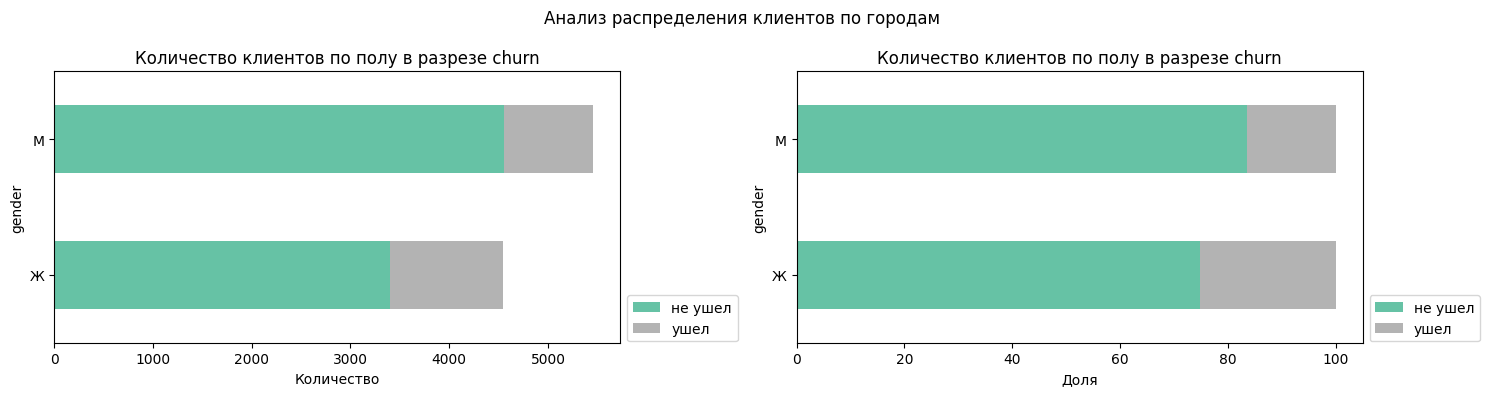

In [34]:
x= 'gender'
# определяем полотно графиков
fig = plt.figure(figsize=(15, 4))
fig.suptitle('Анализ распределения клиентов по городам ') # общий заголовок
# график распредления признака

# количество клиентов с признаком в разрезе категории признака и ушедших/не ушедших
ax = fig.add_subplot(1, 2, 1)
df_city = df.pivot_table(index=x, columns='churn', values='userid', aggfunc='count')
df_city = df_city.rename(columns={0:'не ушел', 1:'ушел'})
ax = df_city.plot(kind='barh', stacked=True, colormap='Set2', ax=ax)
ax.set_title('Количество клиентов по полу в разрезе churn')
ax.set_xlabel('Количество')
ax.set_ylabel(x)
ax.legend(bbox_to_anchor=(1, 0.20))

# доли клиентов с признаком в разрезе категории признака и ушедших/не ушедших
ax = fig.add_subplot(1, 2, 2)
df.pivot_table(index=x, columns='churn_t', values='userid', aggfunc='count')\
            .apply(lambda x: x*100/sum(x), axis=1)\
            .plot(kind='barh', stacked=True, colormap='Set2', ax=ax)
ax.set_title('Количество клиентов по полу в разрезе churn')
ax.set_xlabel('Доля')
ax.set_ylabel(x)
ax.legend(bbox_to_anchor=(1, 0.20))

plt.tight_layout();

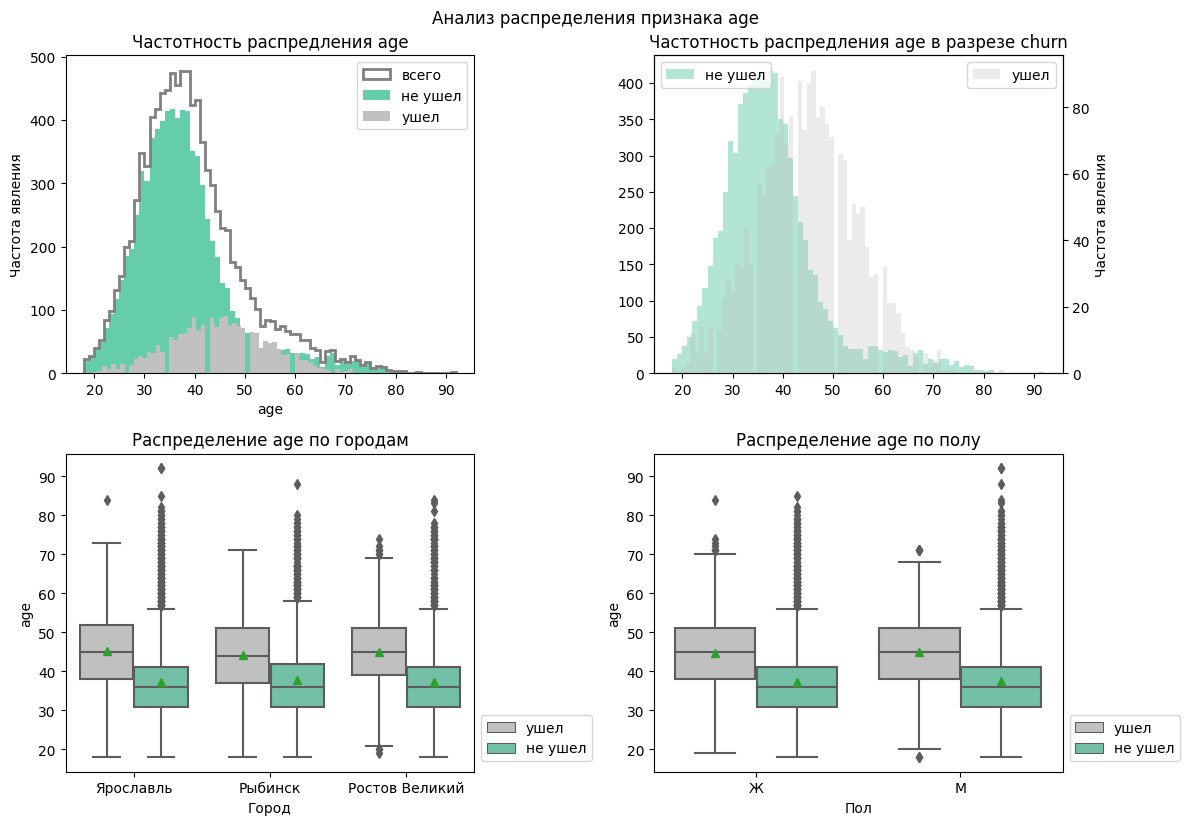

In [35]:
# определяем анализируемый признак
x = 'age'
bins = 74
# определяем полотно графиков
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Анализ распределения признака '+x) # общий заголовок
# график распредления признака
ax = fig.add_subplot(3, 2, 1)
df[x].hist(histtype='step', ls='-', linewidth=2, color='gray', grid=False, bins = bins)
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 1, grid=False, bins = bins)
df[df['churn']==1][x].hist(color='silver', alpha = 1, grid=False, bins = bins).\
legend(['всего', 'не ушел', 'ушел'], loc='upper right')
plt.title('Частотность распредления '+x)
plt.xlabel(x)
plt.ylabel('Частота явления')

# график распредления признака в разрезе churn
ax = fig.add_subplot(3, 2, 2)
ax1 = ax.twinx()
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 0.5, ax=ax, grid=False, bins = bins)\
.legend(['не ушел'],  bbox_to_anchor=(0, 1), loc='upper left')

df[df['churn']==1][x].hist(ax=ax1, color='silver', alpha = 0.3, grid=False, bins = bins)\
.legend(['ушел'], bbox_to_anchor=(1, 1), loc='upper right')
plt.title('Частотность распредления '+x+' в разрезе churn')
plt.xlabel(x)
plt.ylabel('Частота явления')

# боксплоты в разрезе городов и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 3)
ax = sns.boxplot(x='city', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True)
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по городам')
ax.set_xlabel('Город')

# боксплоты в разрезе пола и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 4)
ax = sns.boxplot(x='gender', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True) 
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по полу')
ax.set_xlabel('Пол')

plt.tight_layout();

***Промежуточный вывод:***
- среди женщин доля ушедших примерно на треть выше, чем среди мужчин;
- в возрасте до ~45 и после 65 лет наблюдается преобладание не ушедших над ушедшими;
- медианный и средний возраст среди женщин и мужчин не отличается, что не соответствует среднему возрасту населения региона, где женщины живут дольше;
- медианный возраст в разрезе городов существенно не отличается;
- во всех городах, как среди мужчин, так и женщин медианный возраст ушедших клиентов выше, чем у оставшихся.

### Анализ финансового положения клиентов (баланс, заработная плата, объекты в собственности)

Рассмотрим отдельно каждый из показателей. Начнем с баланса. 

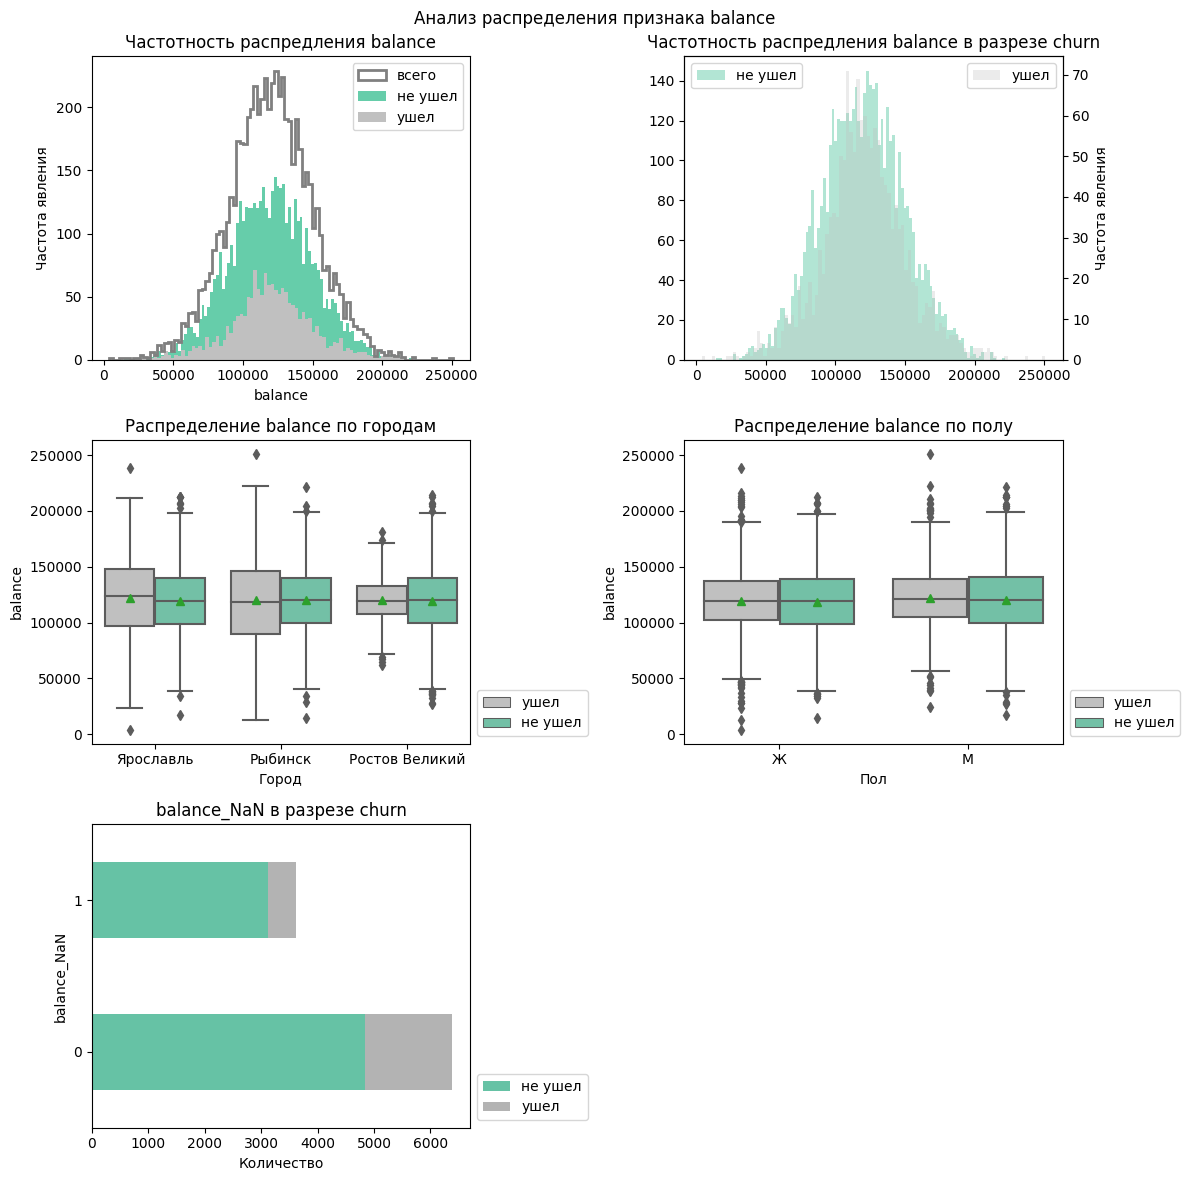

In [36]:
# определяем анализируемый признак
x= 'balance'
x1= 'balance_NaN'
bins = 100
# определяем полотно графиков
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Анализ распределения признака '+x) # общий заголовок
# график распредления признака
ax = fig.add_subplot(3, 2, 1)
df[x].hist(histtype='step', ls='-', linewidth=2, color='gray', grid=False, bins = bins)
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 1, grid=False, bins = bins)
df[df['churn']==1][x].hist(color='silver', alpha = 1, grid=False, bins = bins)\
.legend(['всего', 'не ушел', 'ушел'], loc='upper right')
plt.title('Частотность распредления '+x)
plt.xlabel(x)
plt.ylabel('Частота явления')

# график распредления признака в разрезе churn
ax = fig.add_subplot(3, 2, 2)
ax1 = ax.twinx()
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 0.5, ax=ax, grid=False, bins = bins)\
.legend(['не ушел'],  bbox_to_anchor=(0, 1), loc='upper left')

df[df['churn']==1][x].hist(ax=ax1, color='silver', alpha = 0.3, grid=False, bins = bins)\
.legend(['ушел'], bbox_to_anchor=(1, 1), loc='upper right')
plt.title('Частотность распредления '+x+' в разрезе churn')
plt.xlabel(x)
plt.ylabel('Частота явления')

# боксплоты в разрезе городов и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 3)
ax = sns.boxplot(x='city', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True)
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по городам')
ax.set_xlabel('Город')

# боксплоты в разрезе пола и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 4)
ax = sns.boxplot(x='gender', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True) 
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по полу')
ax.set_xlabel('Пол')

# количество клиентов с признаком в разрезе категории признака и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 5)
ax = df.pivot_table(index = x1, columns='churn_t', values='userid', aggfunc='count').plot(kind='barh', stacked=True, colormap='Set2', ax=ax)
ax.set_title(x1+' в разрезе churn')
ax.set_xlabel('Количество')
ax.set_ylabel(x1)
ax.legend(bbox_to_anchor=(1, 0.20))

plt.tight_layout();

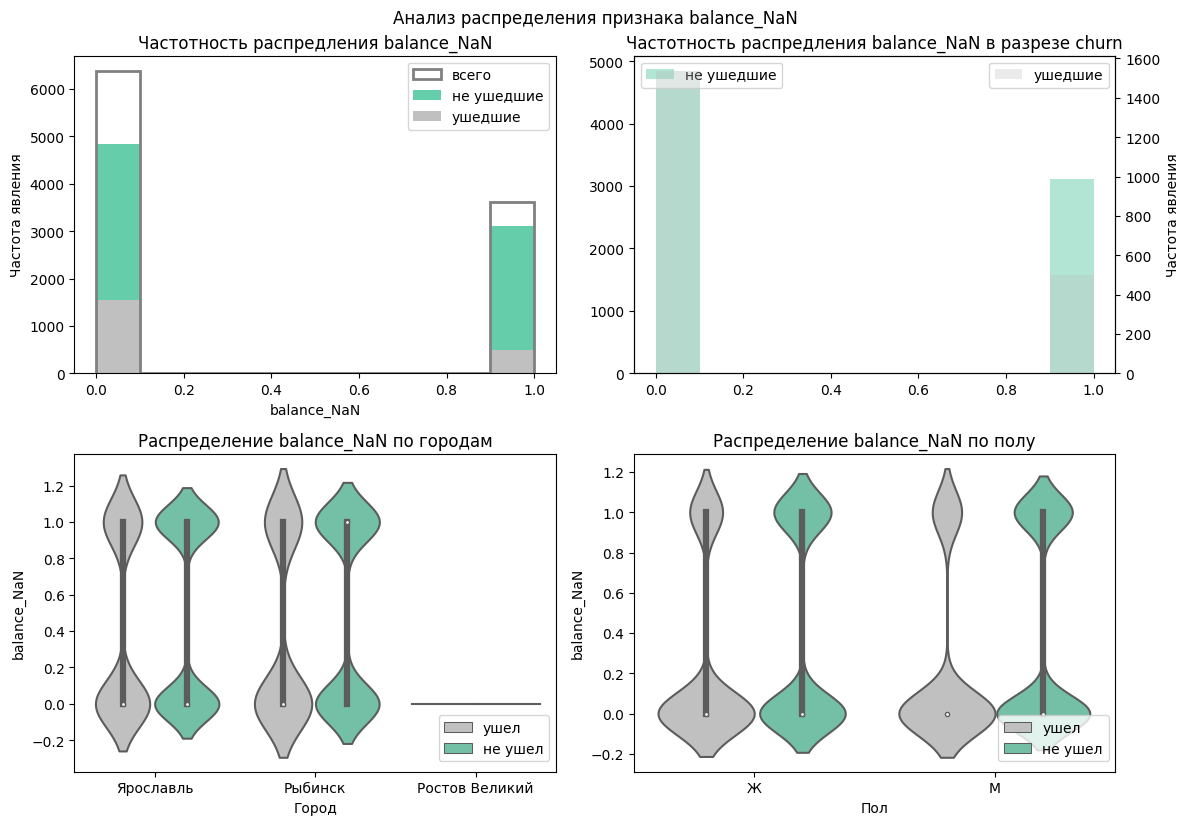

In [37]:
# определяем анализируемый признак
x= 'balance_NaN'
# определяем полотно графиков
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Анализ распределения признака '+x) # общий заголовок
# график распредления признака
ax = fig.add_subplot(3, 2, 1)
df[x].hist(histtype='step', ls='-', linewidth=2, color='gray', grid=False)
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 1, grid=False)
df[df['churn']==1][x].hist(color='silver', alpha = 1, grid=False).legend(['всего', 'не ушедшие', 'ушедшие'], loc='upper right')
plt.title('Частотность распредления '+x)
plt.xlabel(x)
plt.ylabel('Частота явления')

# график распредления признака в разрезе churn
ax = fig.add_subplot(3, 2, 2)
ax1 = ax.twinx()
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 0.5, ax=ax, grid=False).legend(['не ушедшие'],  bbox_to_anchor=(0, 1), loc='upper left')

df[df['churn']==1][x].hist(ax=ax1, color='silver', alpha = 0.3, grid=False).legend(['ушедшие'], bbox_to_anchor=(1, 1), loc='upper right')
plt.title('Частотность распредления '+x+' в разрезе churn')
plt.xlabel(x)
plt.ylabel('Частота явления')

# боксплоты в разрезе городов и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 3)
ax = sns.violinplot(x='city', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'])
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по городам')
ax.set_xlabel('Город')

# боксплоты в разрезе пола и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 4)
ax = sns.violinplot(x='gender', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine']) 
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по полу')
ax.set_xlabel('Пол')

plt.tight_layout();

In [38]:
# проверка медианной по Рыбинску
df.pivot_table(index='city', columns='churn_t', values='balance_NaN', aggfunc={'mean', 'median'})

mean            median     
churn_t          не ушел      ушел не ушел ушел
city                                           
Ростов Великий  0.000000  0.000000     0.0  0.0
Рыбинск         0.501938  0.394673     1.0  0.0
Ярославль       0.495005  0.416049     0.0  0.0

Анализ распределения данных о балансе показывает:
- существенной разницы в медианном уровне баланса и частотности распределения между ушедшими и не ушедшими клиентами не наблюдается;
- доля пропусков в данных о балансе среди ушедших существенно ниже, чем среди остающихся;
- при этом среди ушедших мужчин доля пропусков минимальна;
- а в Ростове, где пропуски отсутствуют, разброс значений баланса между 2 и 3 квартилем среди ушедших клиентов меньше, чем в других городах. Т.к. город малочисленный и в целом более бедный, можно предположить, что среди пропущенных значений больше крупных сумм, отсутствие которых в городах с пропуском увеличило разброс. При этом важно отметить, что медианные значения это не исказило.

Посмотрим на предполагаемую заработную плату.

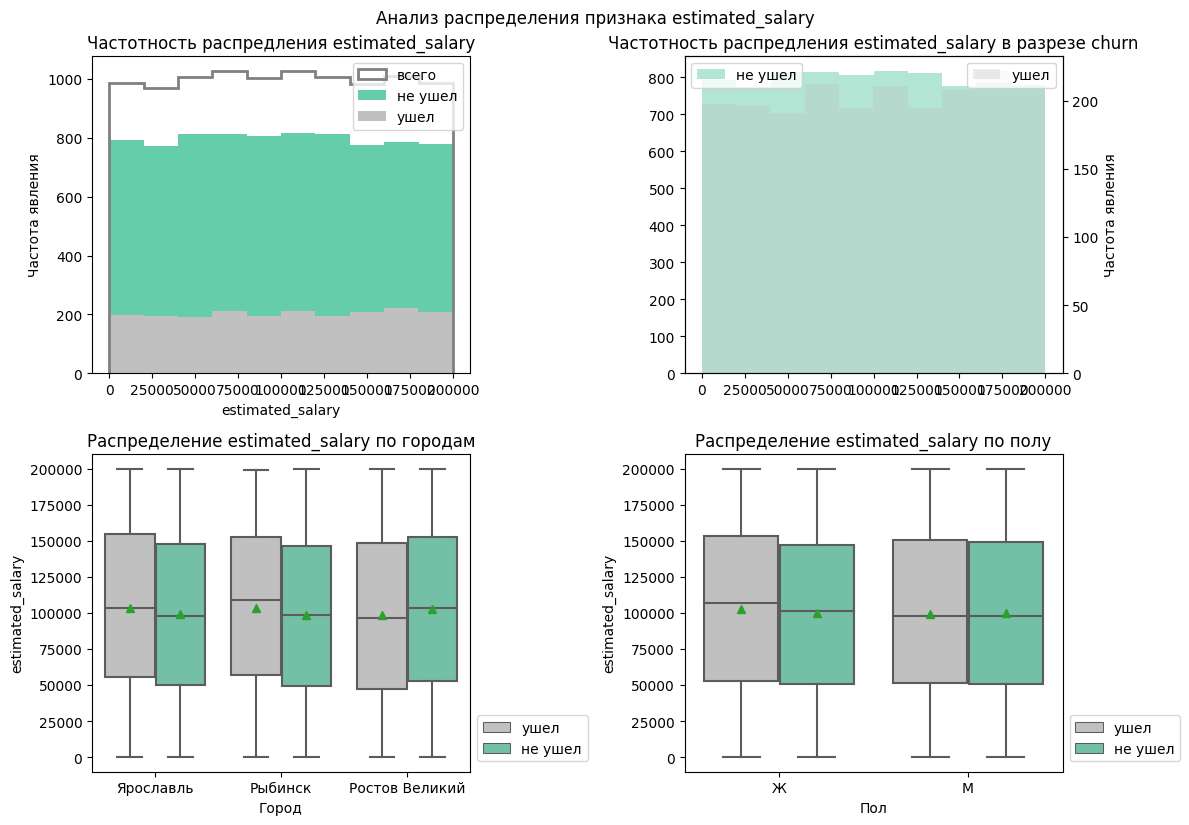

In [39]:
# определяем анализируемый признак
x= 'estimated_salary'
x1= ''
bins = 10
# определяем полотно графиков
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Анализ распределения признака '+x) # общий заголовок
# график распредления признака
ax = fig.add_subplot(3, 2, 1)
df[x].hist(histtype='step', ls='-', linewidth=2, color='gray', grid=False, bins = bins)
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 1, grid=False, bins = bins)
df[df['churn']==1][x].hist(color='silver', alpha = 1, grid=False, bins = bins)\
.legend(['всего', 'не ушел', 'ушел'], loc='upper right')
plt.title('Частотность распредления '+x)
plt.xlabel(x)
plt.ylabel('Частота явления')

# график распредления признака в разрезе churn
ax = fig.add_subplot(3, 2, 2)
ax1 = ax.twinx()
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 0.5, ax=ax, grid=False, bins = bins)\
.legend(['не ушел'],  bbox_to_anchor=(0, 1), loc='upper left')

df[df['churn']==1][x].hist(ax=ax1, color='silver', alpha = 0.3, grid=False, bins = bins)\
.legend(['ушел'], bbox_to_anchor=(1, 1), loc='upper right')
plt.title('Частотность распредления '+x+' в разрезе churn')
plt.xlabel(x)
plt.ylabel('Частота явления')

# боксплоты в разрезе городов и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 3)
ax = sns.boxplot(x='city', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True)
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по городам')
ax.set_xlabel('Город')

# боксплоты в разрезе пола и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 4)
ax = sns.boxplot(x='gender', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True) 
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по полу')
ax.set_xlabel('Пол')

plt.tight_layout();

Анализ распределения данных об оценочной зарплате показывает:
- существенной разницы в медианном уровне оценочной зарплаты и частотности распределения между ушедшими и не ушедшими клиентами не наблюдается. Стоит отметить неправдоподобно равномерный характер распределения заработной платы, что ставит под сомнение корректность показателя. 

Оценим распредление объектов в собственности.

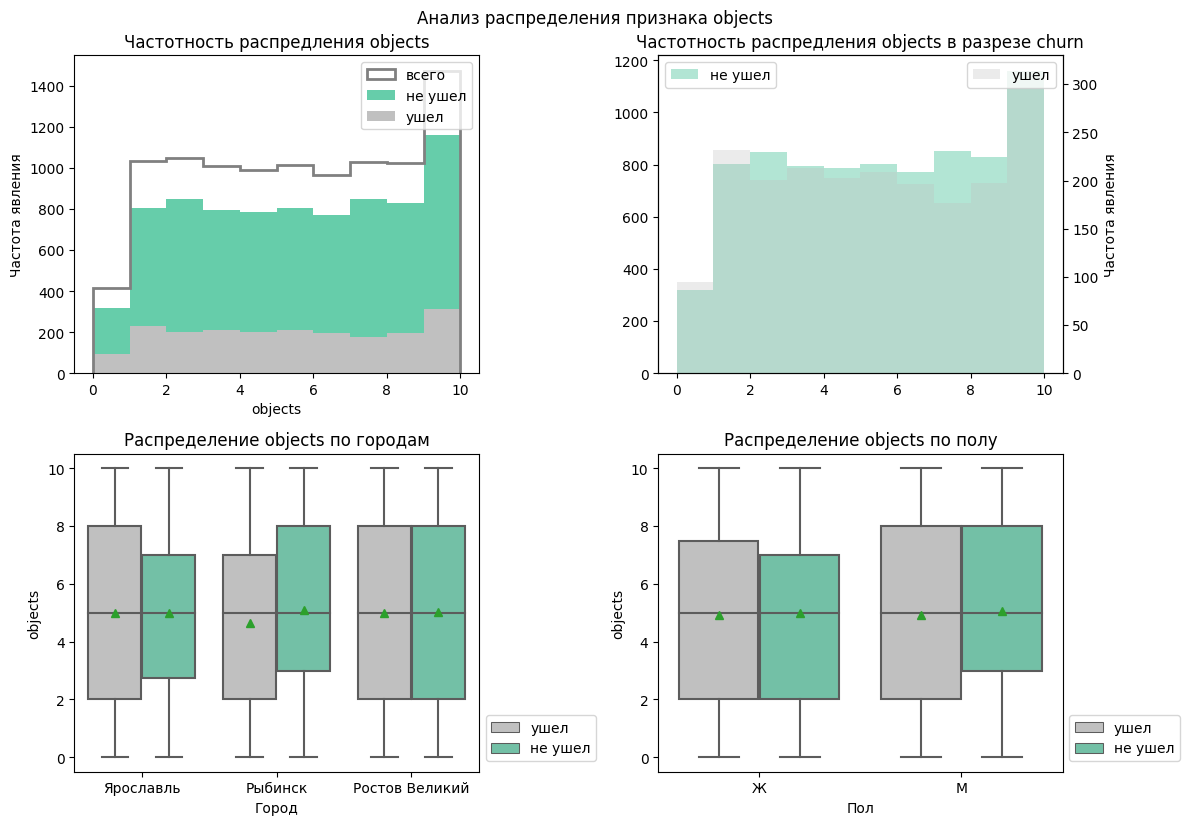

In [40]:
# определяем анализируемый признак
x= 'objects'
x1= ''
bins = 10
# определяем полотно графиков
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Анализ распределения признака '+x) # общий заголовок
# график распредления признака
ax = fig.add_subplot(3, 2, 1)
df[x].hist(histtype='step', ls='-', linewidth=2, color='gray', grid=False, bins = bins)
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 1, grid=False, bins = bins)
df[df['churn']==1][x].hist(color='silver', alpha = 1, grid=False, bins = bins)\
.legend(['всего', 'не ушел', 'ушел'], loc='upper right')
plt.title('Частотность распредления '+x)
plt.xlabel(x)
plt.ylabel('Частота явления')

# график распредления признака в разрезе churn
ax = fig.add_subplot(3, 2, 2)
ax1 = ax.twinx()
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 0.5, ax=ax, grid=False, bins = bins)\
.legend(['не ушел'],  bbox_to_anchor=(0, 1), loc='upper left')

df[df['churn']==1][x].hist(ax=ax1, color='silver', alpha = 0.3, grid=False, bins = bins)\
.legend(['ушел'], bbox_to_anchor=(1, 1), loc='upper right')
plt.title('Частотность распредления '+x+' в разрезе churn')
plt.xlabel(x)
plt.ylabel('Частота явления')

# боксплоты в разрезе городов и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 3)
ax = sns.boxplot(x='city', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True)
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по городам')
ax.set_xlabel('Город')

# боксплоты в разрезе пола и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 4)
ax = sns.boxplot(x='gender', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True) 
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по полу')
ax.set_xlabel('Пол')

plt.tight_layout();

Анализ распределения количества объектов в собственности показывает:
- существенной разницы в медианном уровне объектов в собственности и частотности распределения между ушедшими и не ушедшими клиентами не наблюдается. Стоит отметить неправдоподобное равномерное распределение количества объектов, что ставит под сомнение корректность показателя;
- в Рыбинске среди ушедших наблюдается отрицательное распредление количества объектов относительно медианы, а среди не ушедших - положительное. 

***Промежуточный вывод:***

Качество данных, характеризующих финансовое положение клиентов, низкое:
- распределение заработной платы носит неправдоподобный характер, что ставит под сомнение возможность использования этой информации для анализа. Тем не менее стоит отметить отсутствие существенных отличий в распределении между ушедшими и не ушедшими клиентами.
- распределение количества объектов в собственности носит неправдоподобный характер, к тому же не ясен характер учитываемых объектов (только ли о недвижимости идет речь?), что ставит под сомнение возможность использования этой информации для анализа. Тем не менее стоит отметить отсутствие существенных отличий в распределении между ушедшими и не ушедшими клиентами;
- информация о балансе содержит 36% пропусков. По имеющимся данным существенной разницы в медианном уровне баланса и частотности распределения между ушедшими и не ушедшими клиентами не наблюдается;

Важно отметить, доля пропусков в данных о балансе среди ушедших (а среди мужчин особенно) существенно ниже, чем среди остающихся.


### Анализ характера взаимоотношений клиентов с банком (продукты, кредитные карты, активность)

Рассмотрим распредление количества продуктов.

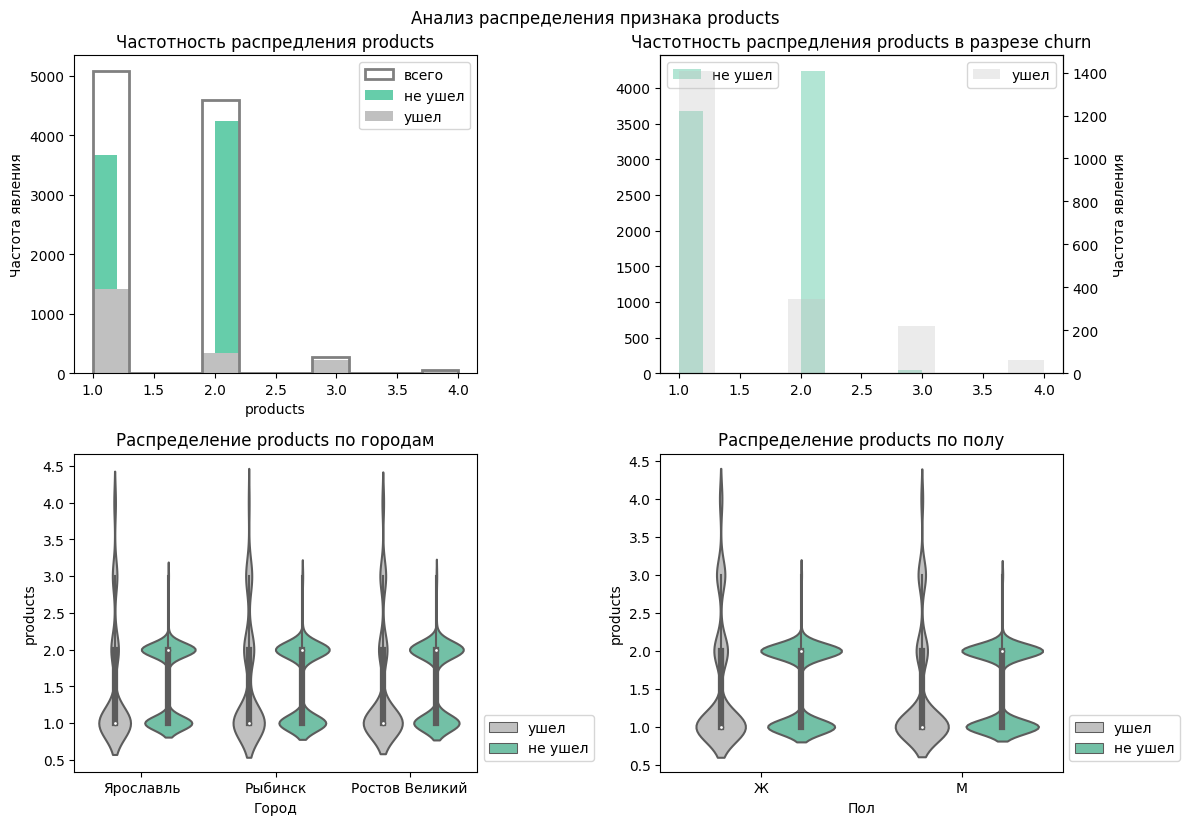

In [41]:
# определяем анализируемый признак
x= 'products'
x1= ''
# определяем полотно графиков
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Анализ распределения признака '+x) # общий заголовок
# график распредления признака
ax = fig.add_subplot(3, 2, 1)
df[x].hist(histtype='step', ls='-', linewidth=2, color='gray', grid=False)
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 1, grid=False)
df[df['churn']==1][x].hist(color='silver', alpha = 1, grid=False)\
.legend(['всего', 'не ушел', 'ушел'], loc='upper right')
plt.title('Частотность распредления '+x)
plt.xlabel(x)
plt.ylabel('Частота явления')

# график распредления признака в разрезе churn
ax = fig.add_subplot(3, 2, 2)
ax1 = ax.twinx()
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 0.5, ax=ax, grid=False)\
.legend(['не ушел'],  bbox_to_anchor=(0, 1), loc='upper left')

df[df['churn']==1][x].hist(ax=ax1, color='silver', alpha = 0.3, grid=False)\
.legend(['ушел'], bbox_to_anchor=(1, 1), loc='upper right')
plt.title('Частотность распредления '+x+' в разрезе churn')
plt.xlabel(x)
plt.ylabel('Частота явления')

# боксплоты в разрезе городов и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 3)
ax = sns.violinplot(x='city', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True)
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по городам')
ax.set_xlabel('Город')

# боксплоты в разрезе пола и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 4)
ax = sns.violinplot(x='gender', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True) 
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по полу')
ax.set_xlabel('Пол')

plt.tight_layout();

Анализ распределения продуктов, используемых клиентами показал:
- среди ушедших клиентов превалирует доля клиентов, имеющих 1 продукт, при этом среди клиентов, имеющих 3 и 4 продукта практически все ушедшие;
- среди остающихся чаще всего клиенты пользуются двумя продуктами, пользователи 3 и 4 продуктов практически отсутствуют;
- разница в распределении по городам и полу отсутствует. 

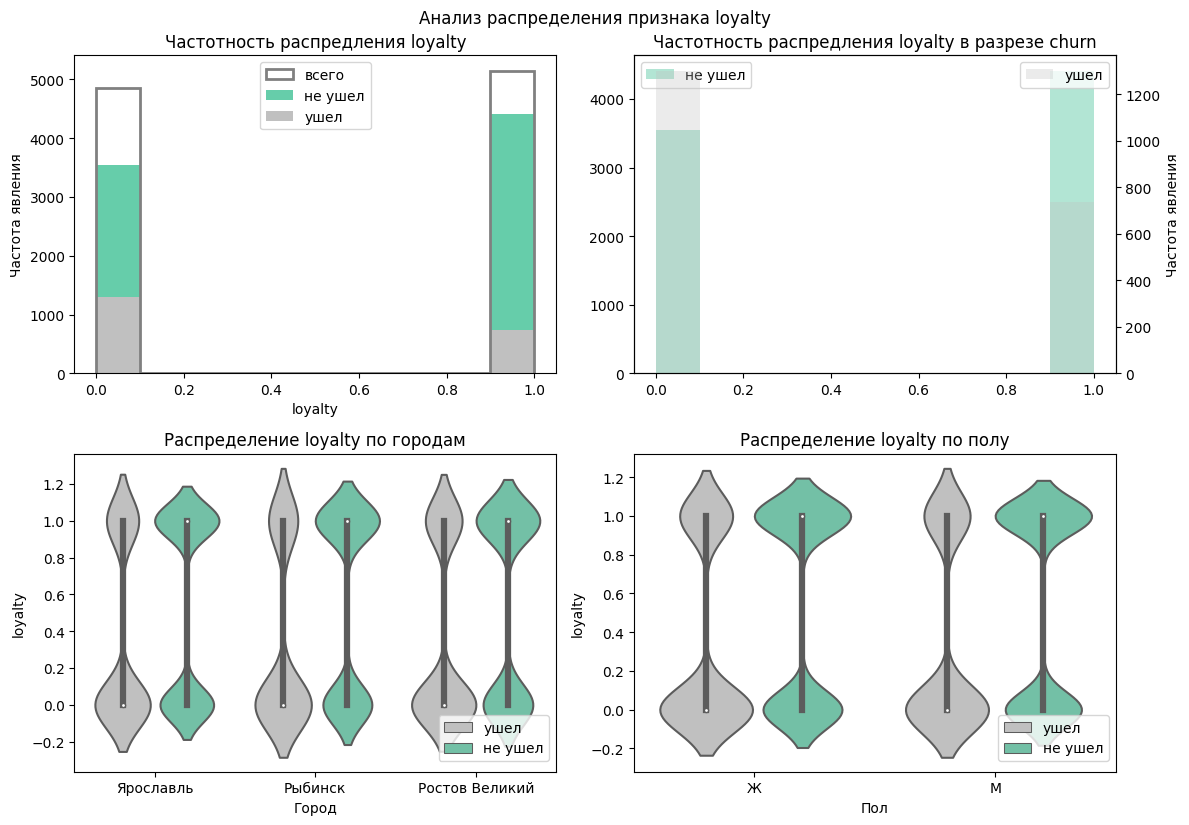

In [42]:
# определяем анализируемый признак
x= 'loyalty'
x1= ''
# определяем полотно графиков
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Анализ распределения признака '+x) # общий заголовок
# график распредления признака
ax = fig.add_subplot(3, 2, 1)
df[x].hist(histtype='step', ls='-', linewidth=2, color='gray', grid=False)
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 1, grid=False)
df[df['churn']==1][x].hist(color='silver', alpha = 1, grid=False)\
.legend(['всего', 'не ушел', 'ушел'], loc='upper center')
plt.title('Частотность распредления '+x)
plt.xlabel(x)
plt.ylabel('Частота явления')

# график распредления признака в разрезе churn
ax = fig.add_subplot(3, 2, 2)
ax1 = ax.twinx()
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 0.5, ax=ax, grid=False)\
.legend(['не ушел'],  bbox_to_anchor=(0, 1), loc='upper left')

df[df['churn']==1][x].hist(ax=ax1, color='silver', alpha = 0.3, grid=False)\
.legend(['ушел'], bbox_to_anchor=(1, 1), loc='upper right')
plt.title('Частотность распредления '+x+' в разрезе churn')
plt.xlabel(x)
plt.ylabel('Частота явления')

# боксплоты в разрезе городов и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 3)
ax = sns.violinplot(x='city', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True)
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по городам')
ax.set_xlabel('Город')

# боксплоты в разрезе пола и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 4)
ax = sns.violinplot(x='gender', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True) 
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по полу')
ax.set_xlabel('Пол')

plt.tight_layout();

Анализ распределения клиентов по активности показал:
- среди неактивных клиентов доля ушедших выше примерно на 40%;
- разница в распределении по городам и полу отсутствует. 

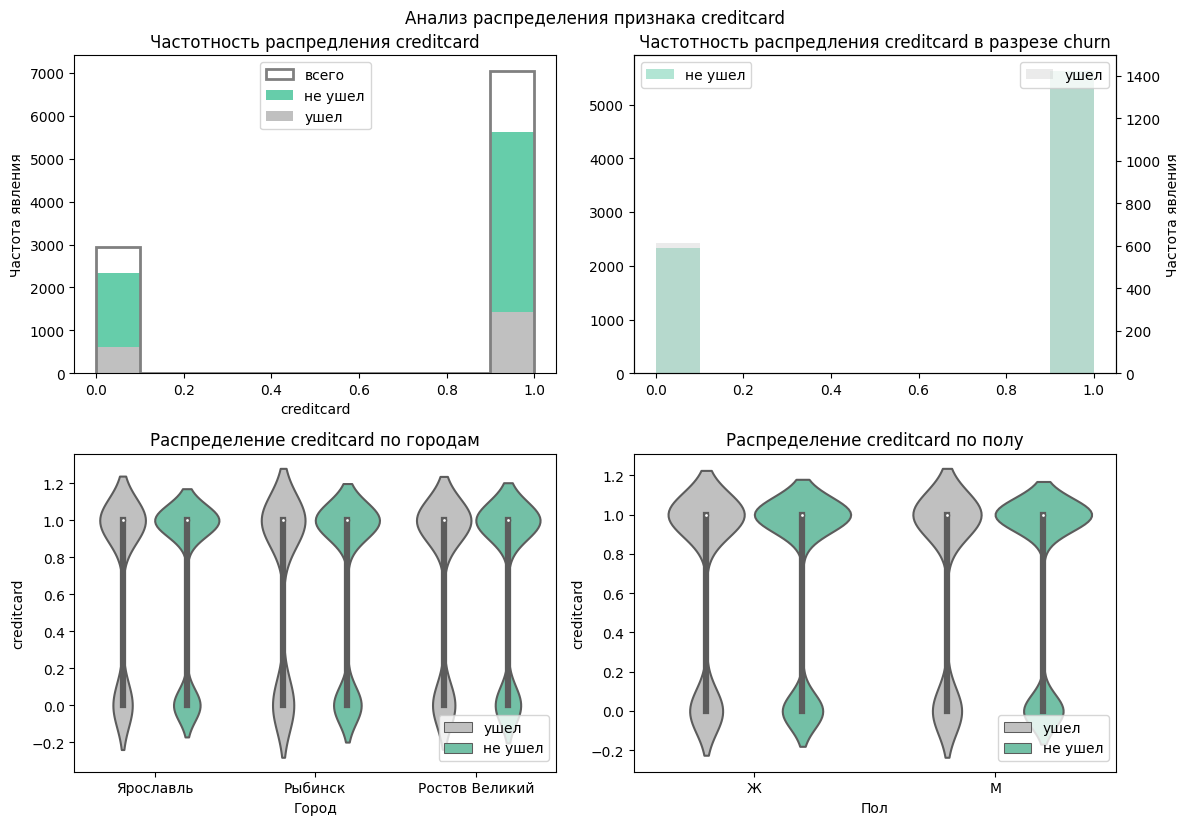

In [43]:
# определяем анализируемый признак
x= 'creditcard'
x1= ''
# определяем полотно графиков
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Анализ распределения признака '+x) # общий заголовок
# график распредления признака
ax = fig.add_subplot(3, 2, 1)
df[x].hist(histtype='step', ls='-', linewidth=2, color='gray', grid=False)
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 1, grid=False)
df[df['churn']==1][x].hist(color='silver', alpha = 1, grid=False)\
.legend(['всего', 'не ушел', 'ушел'], loc='upper center')
plt.title('Частотность распредления '+x)
plt.xlabel(x)
plt.ylabel('Частота явления')

# график распредления признака в разрезе churn
ax = fig.add_subplot(3, 2, 2)
ax1 = ax.twinx()
df[df['churn']==0][x].hist(color='mediumaquamarine', alpha = 0.5, ax=ax, grid=False)\
.legend(['не ушел'],  bbox_to_anchor=(0, 1), loc='upper left')

df[df['churn']==1][x].hist(ax=ax1, color='silver', alpha = 0.3, grid=False)\
.legend(['ушел'], bbox_to_anchor=(1, 1), loc='upper right')
plt.title('Частотность распредления '+x+' в разрезе churn')
plt.xlabel(x)
plt.ylabel('Частота явления')

# боксплоты в разрезе городов и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 3)
ax = sns.violinplot(x='city', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True)
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по городам')
ax.set_xlabel('Город')

# боксплоты в разрезе пола и ушедших/не ушедших
ax = fig.add_subplot(3, 2, 4)
ax = sns.violinplot(x='gender', y=x, hue='churn_t', data=df, palette=['silver', 'mediumaquamarine'], showmeans=True) 
ax.legend(bbox_to_anchor=(1, 0.20))
ax.set_title('Распределение '+x+' по полу')
ax.set_xlabel('Пол')

plt.tight_layout();

Анализ распределения клиентов по наличию кредитной карты показал:
- отсутствие существенных различий в распределении между ушедшими и остающимися клиентами;
- отсутствие существенных различий в распределении по городам и полу.

***Промежуточный вывод:***

- среди пользователей 1 продукта доля ушедших достигает 25-30%, что в разы выше, чем среди пользователей 2-х продуктов, при этом среди пользователей 3-4 продуктов практически все клиенты ушедшие;
- среди неактивных клиентов доля ушедших выше примерно на 40%, чем среди не ушедших;
- в зависимости от использования кредитной карты клиенты распределены между ушедшими и не ушедшими клиентами без существенных отличий;
- отсутствует разница в распределении по городам и полу между в зависимости от активности, количества продуктов и наличия кредитной карты, в том числе в разрезе ушедших и не ушедших клиентов. 

### Анализ оттока в разрезе комбинации ключевых признаков

Расчет вариантов комбинаций.

In [44]:
# список комбинируемых признаков
list=['city', 'products', 'age', 'loyalty', 'gender']
# расчет комбинаций
for i in combinations(list, 2):
    print(i, end='\n')

('city', 'products')
('city', 'age')
('city', 'loyalty')
('city', 'gender')
('products', 'age')
('products', 'loyalty')
('products', 'gender')
('age', 'loyalty')
('age', 'gender')
('loyalty', 'gender')


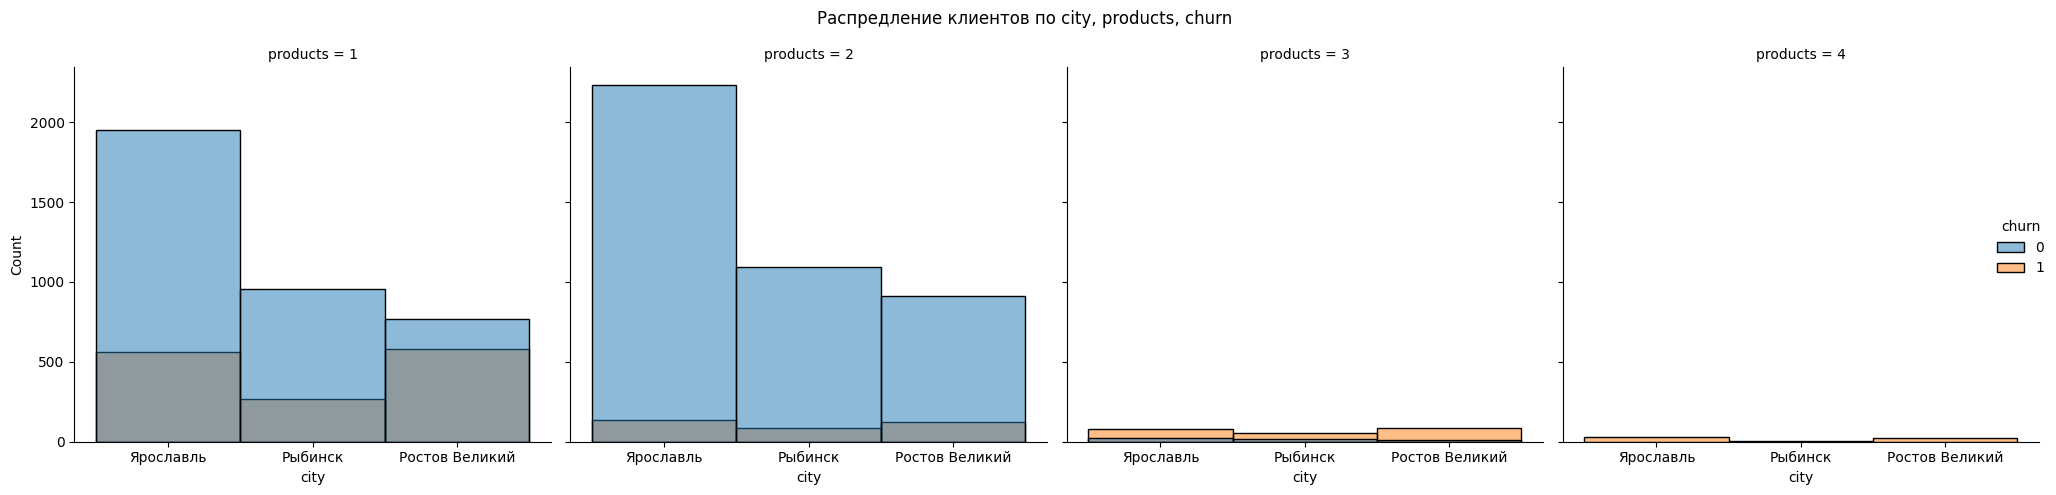

In [45]:
# опредление параметров
x = 'city'
y = 'products'
h = 'churn'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

В разрезе городов среди владельцев 1-2 продукта доля ушедших выше всего в Ростове.

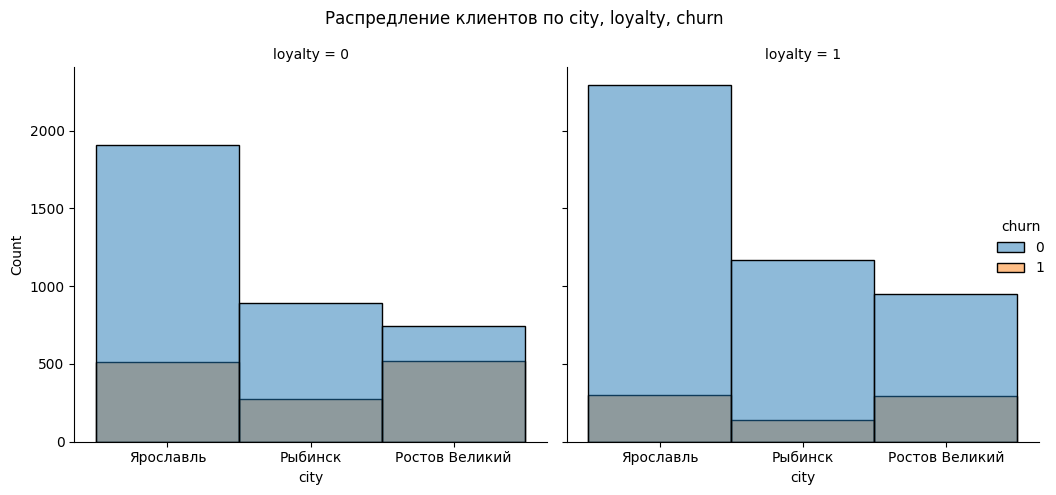

In [46]:
# опредление параметров
x = 'city'
y = 'loyalty'
h = 'churn'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

Среди неактивных клиентов доля ушедших выше во всех городах.

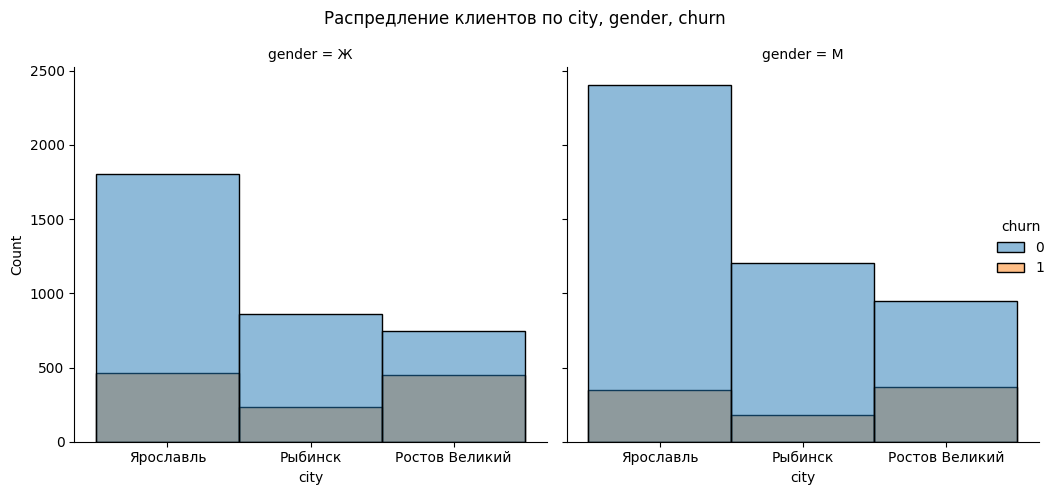

In [47]:
# опредление параметров
x = 'city'
y = 'gender'
h = 'churn'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

Среди женщин доля ушедших выше во всех городах.

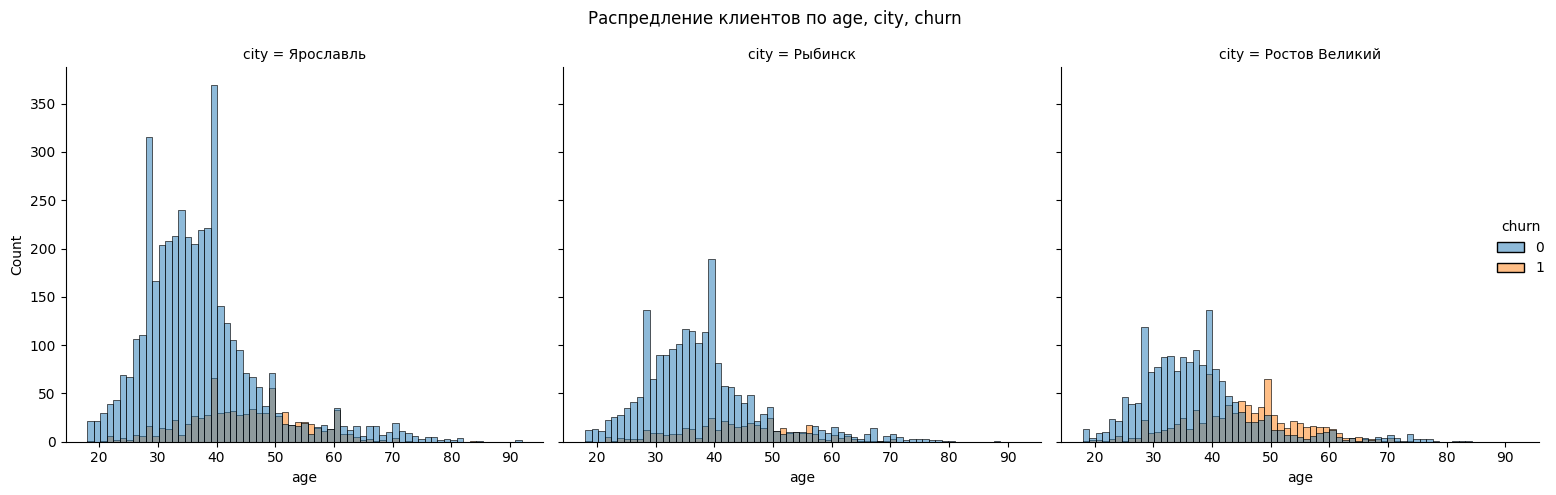

In [48]:
# опредление параметров
x = 'age'
y = 'city'
h = 'churn'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

Для Ростова характерно преобладание доли ушедших над не ушедшими начиная с 45 лет до 65, в остальных городах этот диапазон начинается с 50+ лет и заканчивается в районе 57 лет, периодически прерываясь. Однако в целом для всех городов характерен рост доли ушедших в дипазоне 45-47 лет до 63-65.  

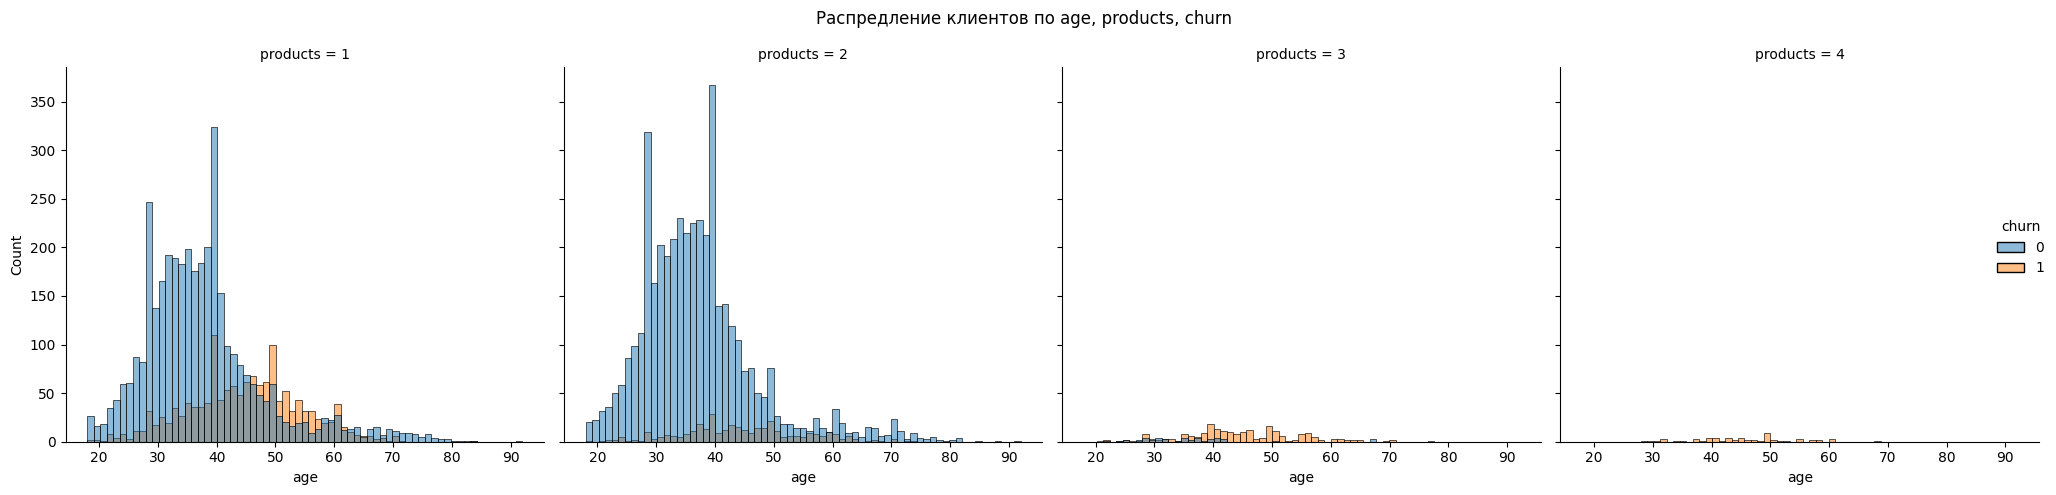

In [49]:
# опредление параметров
x = 'age'
y = 'products'
h = 'churn'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

В разрезе продуктов преобладание ушедших над не ушедшими в возрасте от 45 до 60 лет наблюдается в случа с использованием 1 продукта.

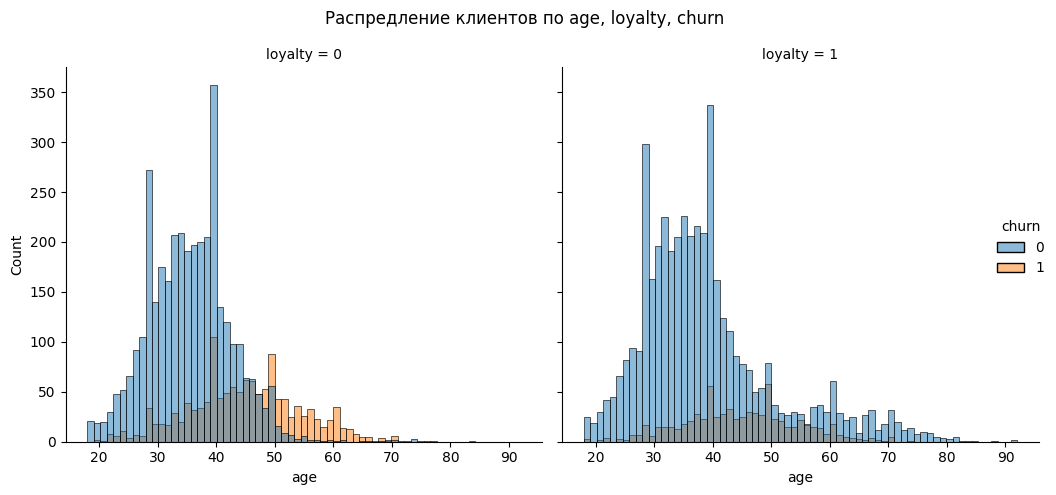

In [50]:
# опредление параметров
x = 'age'
y = 'loyalty'
h = 'churn'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

Среди неактивных клиентов преобладание ушедших над не ушедшими наблюдается с 45+ лет, среди активных доля ушедших начиная с этого возраста увеличивается, но никогда не превосходит остающихся, а после 60 лет идет на спад.

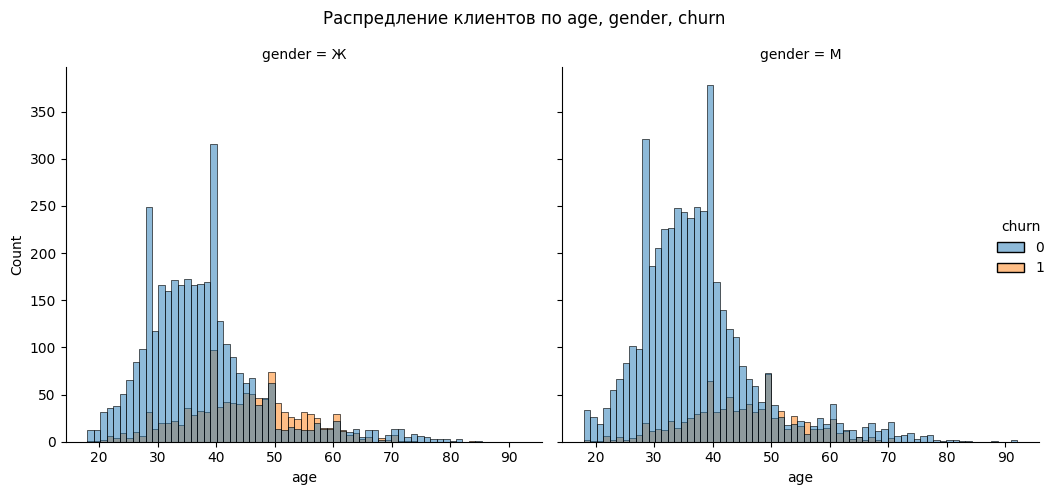

In [51]:
# опредление параметров
x = 'age'
y = 'gender'
h = 'churn'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

В зависимости от пола в диапазоне от 50 до 60 лет среди женщин доля уходящих стабильно выше, среди мужчин она тоже приближается к оставшимся, но редко их превосходит. 

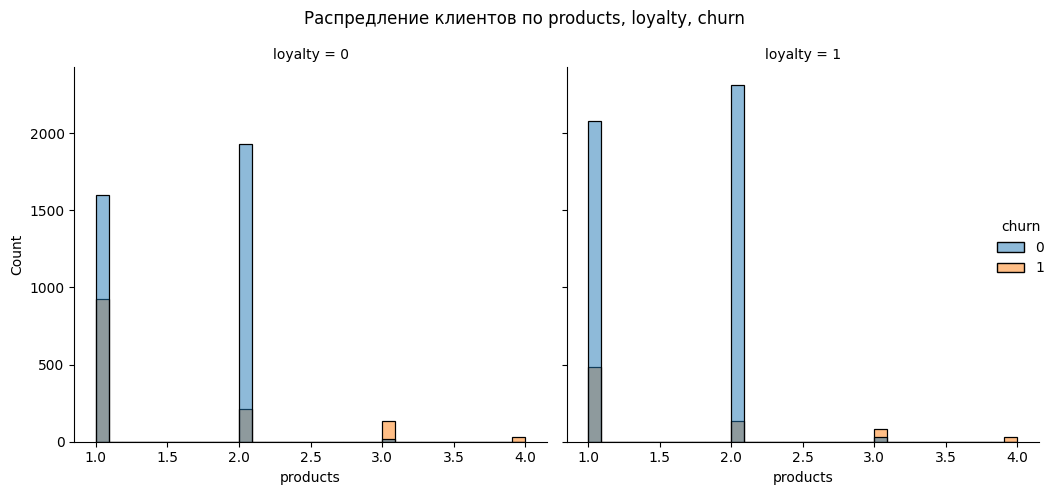

In [52]:
# опредление параметров
x = 'products'
y = 'loyalty'
h = 'churn'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

Вне зависимости от количества продуктов среди неактивных доля ушедших всегда выше, однако для 1 продукта расхождения более значимы. 

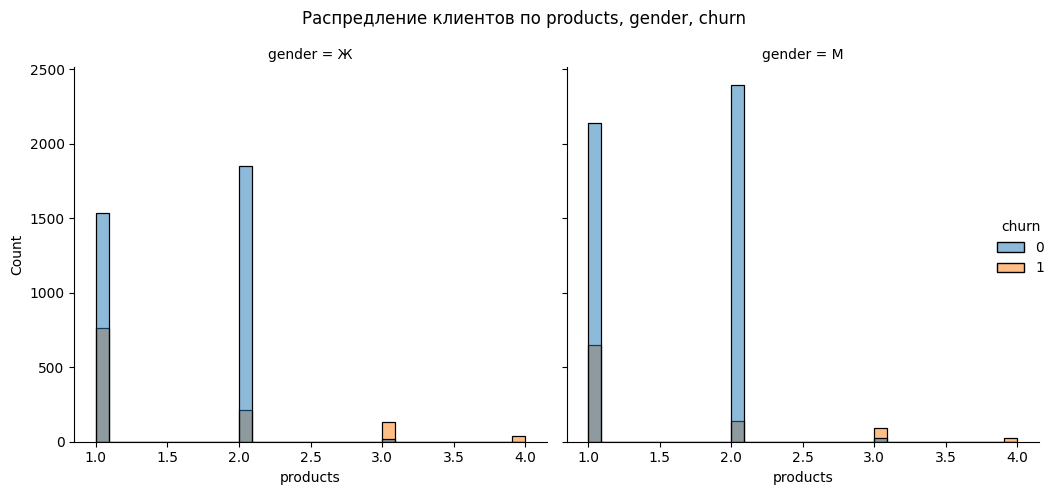

In [53]:
# опредление параметров
x = 'products'
y = 'gender'
h = 'churn'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

Вне зависимости от количества продуктов среди женщин доля ушедших всегда выше. 

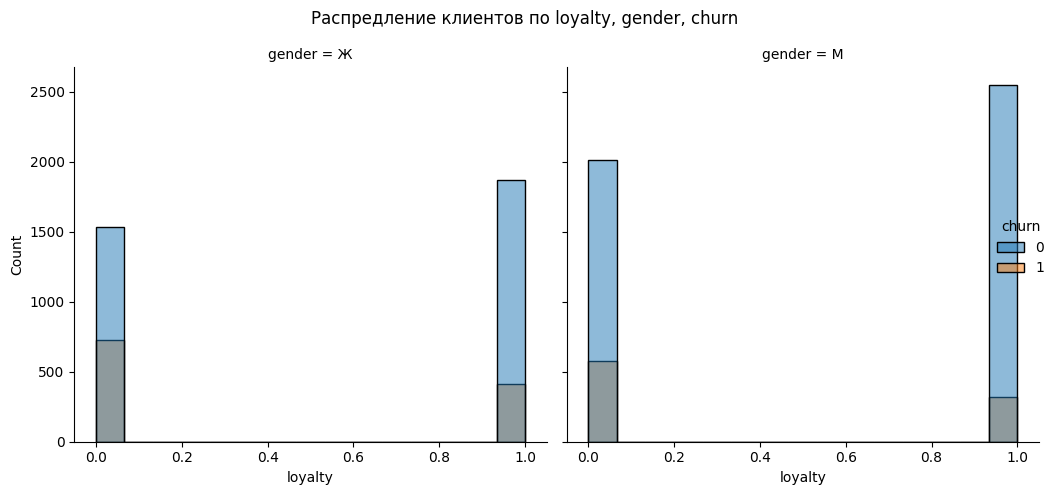

In [54]:
# опредление параметров
x = 'loyalty'
y = 'gender'
h = 'churn'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

В разрезе комбинации активности и пола пропорция ушедших и не ушедших характеризуется описанными ранее закономерностями: преобладанием ушедших среди женщин и неактивных клиентов.

***Прмежуточный вывод:***
- В разрезе городов среди владельцев 1-2 продукта доля ушедших выше всего в Ростове;
- Среди неактивных клиентов и женщин доля ушедших выше во всех городах;
- Для Ростова характерно преобладание доли ушедших над не ушедшими начиная с 45 лет до 65, в остальных городах этот диапазон начинается с 50+ лет и заканчивается в районе 57 лет, периодически прерываясь. Однако в целом для всех городов характерен рост доли ушедших в дипазоне 45-47 лет до 63-65;
- В разрезе продуктов преобладание ушедших над не ушедшими в возрасте от 45 до 60 лет наблюдается в случа с использованием 1 продукта;
- Среди неактивных клиентов преобладание ушедших над не ушедшими наблюдается с 45+ лет, среди активных доля ушедших начиная с этого возраста увеличивается, но никогда не превосходит остающихся, а после 60 лет идет на спад.
- В зависимости от пола в диапазоне от 50 до 60 лет среди женщин доля уходящих стабильно выше, среди мужчин она тоже приближается к оставшимся, но редко их превосходит;
- Вне зависимости от количества продуктов среди неактивных доля ушедших всегда выше, однако для 1 продукта расхождения более значимы;
- Вне зависимости от количества продуктов среди женщин доля ушедших всегда выше.

### Корреляционный анализ (выявление факторов, наиболее тесно связанных с уходом и между собой)

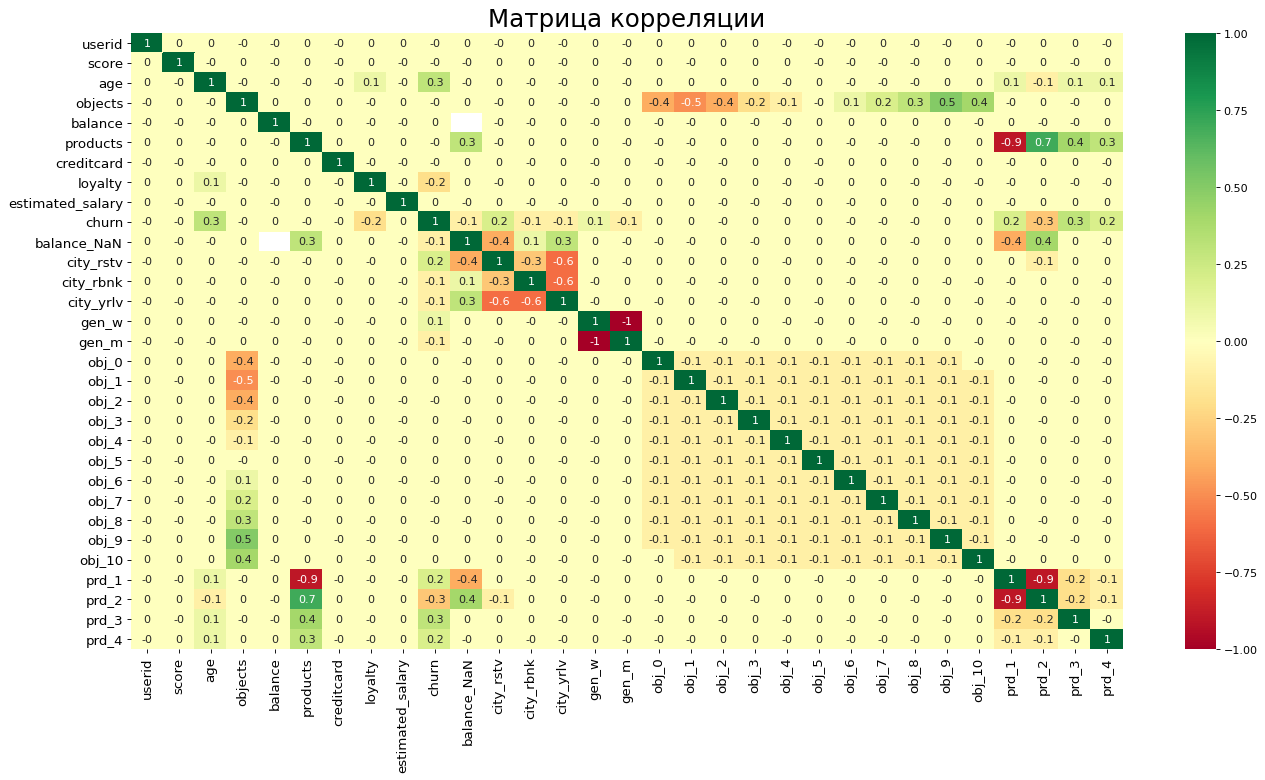

In [55]:
# строим матрицу корреляции
plt.figure(figsize=(20,10), dpi= 80)
sns.heatmap(df.corr().round(1), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

***Промежуточный вывод:***

Матрица корреляции Пирсона показала наличие следующих связей между показателями:
1. Уход пользователей связан с:
- возрастом 0,3 (чем выше возраст, тем вероятнее уход);
- использование 1-го (0.2), 3-х (0.3) и 4-х (0.2) продуктов увеличивает вероятность ухода;
- использование 2-х продуктов (-0.3) снижает вероятность ухода;
- активностью -0,2 (с повышением активности, меньше отток);
- городом Ростов 0,2 (нахождение в Ростове увеличивает вероятность оттока);
- женским полом 0.1 (принадлежность к женскому полу увеличивает вероятность оттока). 

2. Помимо связи с уходом матрица также показывает наличие следующих взаимосвязей между показателями:
- пропуски в балансе с нахождением в Ярославле (0.3) или Ростове (-0.4), а также использованием 1 (-0.4) или 2-х (0.4) продуктов;
- количество используемых продуктов с возрастом: использование 2-х продуктов характерно для более молодых групп (-0,1);
- пропуски в балансе с ушедшими клиентами (-0.1).

Сравним корреляцию Пиросна с корреляцией phik, используемой в случае нахождения связи и между численными и категориальными переменными. Поскольку ранее категориальные данные были закодирваны, что должно исключить искажение показателя при расчете корреляции пирсона, то не должно наблюдаться существенных различий между методами.  

In [56]:
# установка пакета phik
!pip install phik

     ---------------------------------------- 0.0/663.5 kB ? eta -:--:--
      --------------------------------------- 10.2/663.5 kB ? eta -:--:--
     --- --------------------------------- 61.4/663.5 kB 656.4 kB/s eta 0:00:01
     --------- ---------------------------- 163.8/663.5 kB 1.2 MB/s eta 0:00:01
     ----------------- -------------------- 307.2/663.5 kB 1.6 MB/s eta 0:00:01
     -------------------------- ----------- 471.0/663.5 kB 2.1 MB/s eta 0:00:01
     ------------------------------------ - 645.1/663.5 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 663.5/663.5 kB 2.2 MB/s eta 0:00:00


In [57]:
# импорт библиотеки
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [58]:
# расчет коэффициента корреляции-phik
df_phik = df.phik_matrix()
df_phik.round(2)

interval columns not set, guessing: ['userid', 'score', 'age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn', 'balance_NaN', 'city_rstv', 'city_rbnk', 'city_yrlv', 'gen_w', 'gen_m', 'obj_0', 'obj_1', 'obj_2', 'obj_3', 'obj_4', 'obj_5', 'obj_6', 'obj_7', 'obj_8', 'obj_9', 'obj_10', 'prd_1', 'prd_2', 'prd_3', 'prd_4']


,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,...,obj_9,obj_10,prd_1,prd_2,prd_3,prd_4,creditcard_t,loyalty_t,churn_t,score_cat
userid,1.00,0.02,0.00,0.00,0.04,0.00,0.02,0.01,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.03,0.04
score,0.02,1.00,0.04,0.00,0.00,0.00,0.00,0.03,0.00,0.04,...,0.00,0.00,0.00,0.03,0.01,0.04,0.00,0.04,0.10,1.00
city,0.00,0.04,1.00,0.01,0.09,0.01,0.13,0.05,0.00,0.01,...,0.01,0.00,0.02,0.03,0.03,0.02,0.00,0.01,0.10,0.00
gender,0.00,0.00,0.01,1.00,0.03,0.04,0.00,0.06,0.00,0.03,...,0.02,0.03,0.00,0.00,0.05,0.04,0.00,0.03,0.17,0.00
age,0.04,0.00,0.09,0.03,1.00,0.04,0.00,0.15,0.02,0.19,...,0.03,0.05,0.11,0.16,0.11,0.09,0.02,0.19,0.49,0.00
objects,0.00,0.00,0.01,0.04,0.04,1.00,0.07,0.06,0.03,0.02,...,0.83,1.00,0.06,0.06,0.05,0.02,0.03,0.02,0.02,0.00
balance,0.02,0.00,0.13,0.00,0.00,0.07,1.00,0.04,0.05,0.02,...,0.00,0.03,0.00,0.00,0.07,0.00,0.05,0.02,0.11,0.03
products,0.01,0.03,0.05,0.06,0.15,0.06,0.04,1.00,0.00,0.06,...,0.01,0.00,1.00,1.00,1.00,1.00,0.00,0.06,0.57,0.00
creditcard,0.00,0.00,0.00,0.00,0.02,0.03,0.05,0.00,1.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.01,0.00,0.00
loyalty,0.01,0.04,0.01,0.03,0.19,0.02,0.02,0.06,0.01,1.00,...,0.03,0.00,0.03,0.05,0.04,0.00,0.01,1.00,0.24,0.04


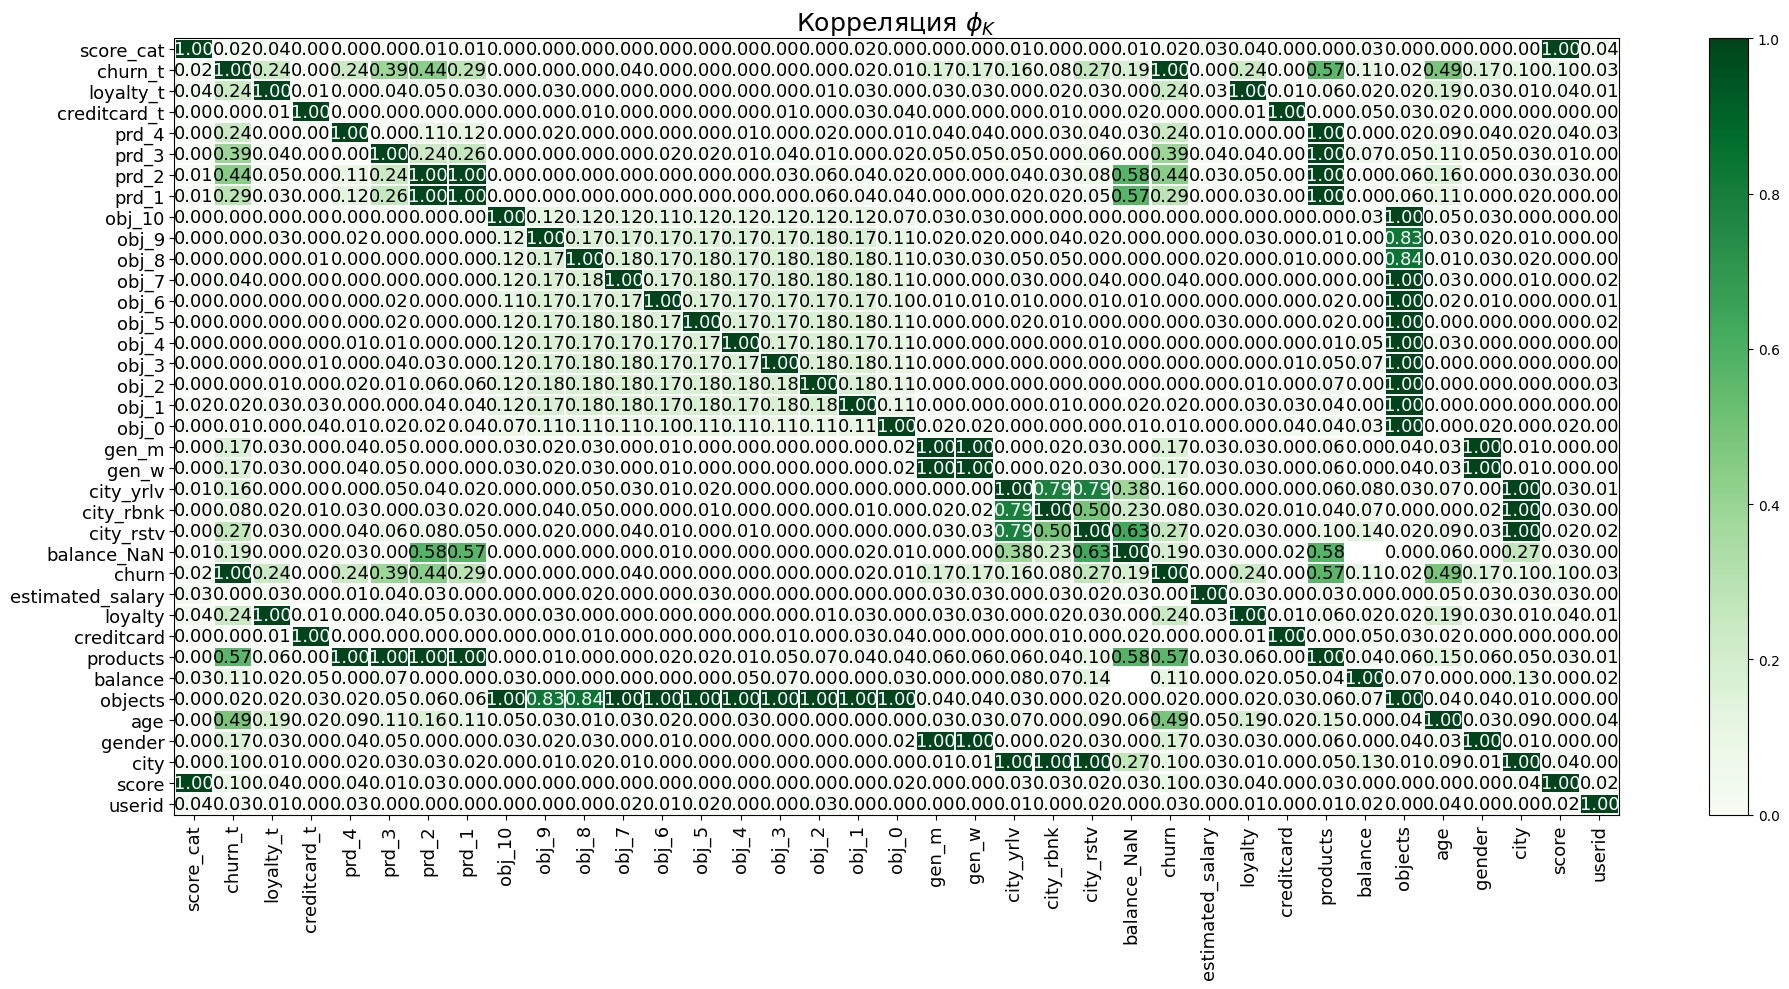

In [59]:
# построение матрицы корреляции phik
plot_correlation_matrix(df_phik.values, 
                        x_labels=df_phik.columns, 
                        y_labels=df_phik.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корреляция $\phi_K$", 
                        fontsize_factor=1.3, 
                        figsize=(20, 10))
plt.tight_layout()

***Промежуточный вывод:***

Матрица корреляции phik показала наличие следующих связей между показателями, не определяя при этом их направление:
1. Уход пользователей связан с:
- использованием 1-го (0.3), 2-х (0.4) 3-х (0.4) и 4-х (0.2) продуктов. Общая теснота связи с продуктом = 0.6;
- возрастом (теснота связи = 0,5);
- городом Ростов (0,3), но также Ярославлем (0.2);
- активностью (0,2);
- принадлежностью к какому-либо полу (0.2 для мужчин и женщин);
- не обнаруженная при использовании коэффициента Пирсона незначительная связь найдена с балансом (0.1) (возможно опосредовано через пропуски, где она = 0.2) и рейтингом (0.1), что вероятно вызвано отсутсвием не ушедших клиентов при рейтинге = <400.

2. Помимо связи с уходом матрица также показывает наличие следующих взаимосвязей между показателями:
- пропуски в балансе с нахождением в Ярославле (0.4) или Ростове (0.6), а также использованием 1 (0.6) или 2-х (0.6) продуктов;
- пропуски в балансе с ушедшими клиентами (0.2);
- количество используемых продуктов с возрастом: использование 2-х продуктов характерно для более молодых групп (0,2);
- не выявленная в матрице корреляции Пиросна связь возраста с активностью (0.2).

### Портреты клиентов в разрезе городов, пола и возраста

Рассмотрим, взаимное влияние признаков, отмеченных ранее как влияющие на какой-либо из изучаемых параметров:
- город;
- продукты;
- возраст;
- активность;
- пол.

Выделим отедльно датафрейм с признаками, которые могут понадобиться для анализа.

In [60]:
df_c = df[['score', 'city', 'gender', 'age', 'balance', 'products', 'loyalty', 'churn', 'balance_NaN',\
           'city_rstv', 'city_rbnk', 'city_yrlv', 'gen_w', 'gen_m', 'loyalty_t', 'churn_t']]

Рассчитаем комбинации ключевых исследуемых признаков. 

In [61]:
# список признаков
list=['city', 'products', 'age', 'loyalty', 'gender']
# расчет комбинаций
for i in combinations(list, 3):
    print(i, end='\n')

('city', 'products', 'age')
('city', 'products', 'loyalty')
('city', 'products', 'gender')
('city', 'age', 'loyalty')
('city', 'age', 'gender')
('city', 'loyalty', 'gender')
('products', 'age', 'loyalty')
('products', 'age', 'gender')
('products', 'loyalty', 'gender')
('age', 'loyalty', 'gender')


In [62]:
# матрица соотношения средних в разрезе признаков к количеству продуктов
df_c.groupby(by='products').agg({'mean'}).round(2).T.unstack().style.background_gradient(cmap = 'Blues', axis=1)

products,1,2,3,4
,mean,mean,mean,mean
score,649.120000,652.190000,648.110000,653.580000
age,39.670000,37.750000,43.200000,45.680000
balance,119894.160000,119660.940000,119475.690000,122260.610000
loyalty,0.500000,0.530000,0.420000,0.480000
churn,0.280000,0.080000,0.830000,1.000000
balance_NaN,0.180000,0.570000,0.370000,0.230000
city_rstv,0.270000,0.230000,0.360000,0.400000
city_rbnk,0.240000,0.260000,0.250000,0.120000
city_yrlv,0.490000,0.520000,0.390000,0.480000


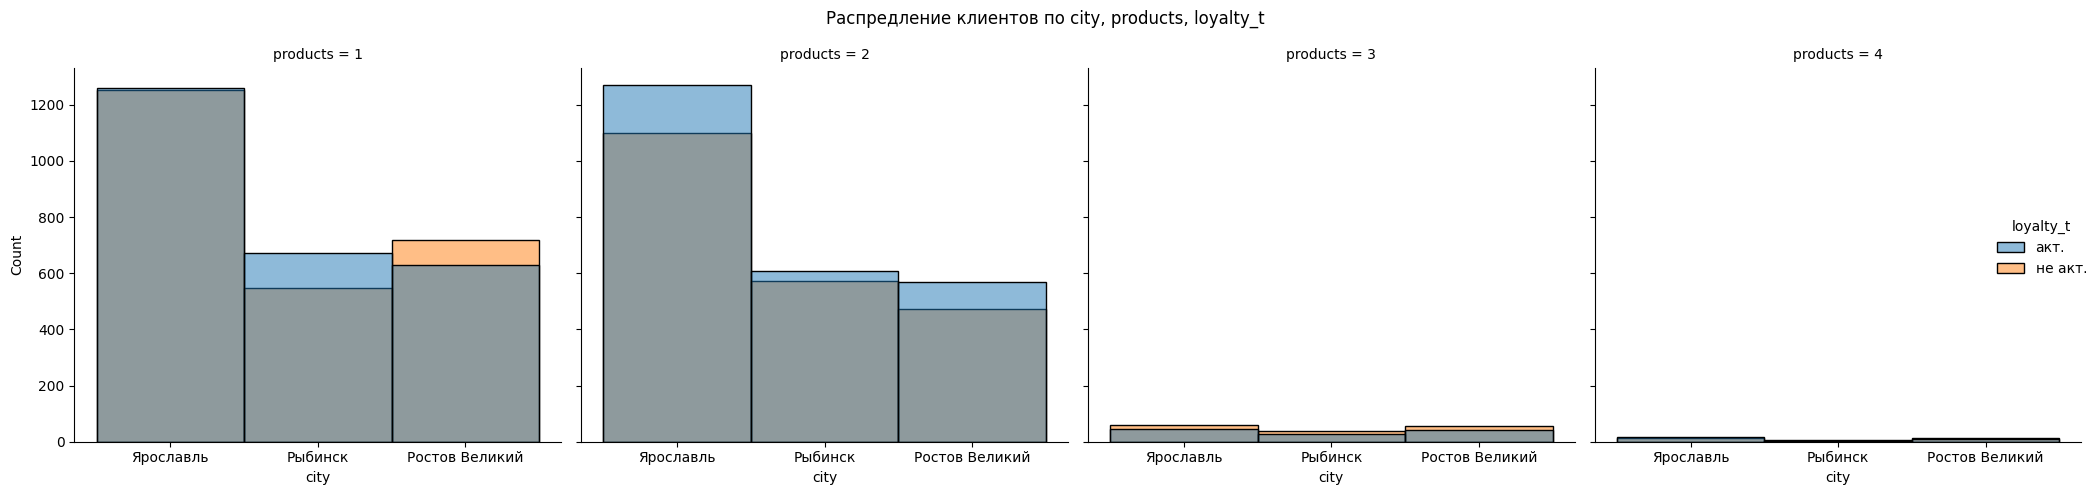

In [63]:
# опредление параметров 1
x = 'city'
y = 'products'
h = 'loyalty_t'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

1. - Активных клиентов среди пользователей 2-х продукта в среднем больше, чем неактивных, что не характерно для иного количества продуктов. Исключением являются пользователи 1 продукта в Рыбинске; 
   - Пропорциональное соотношение пользователей в разных городах в зависимости от типа продукта существенно не отличается в случае 1-2 продуктов, но для 3-х продуктов доля Ярославля резко сокращается.

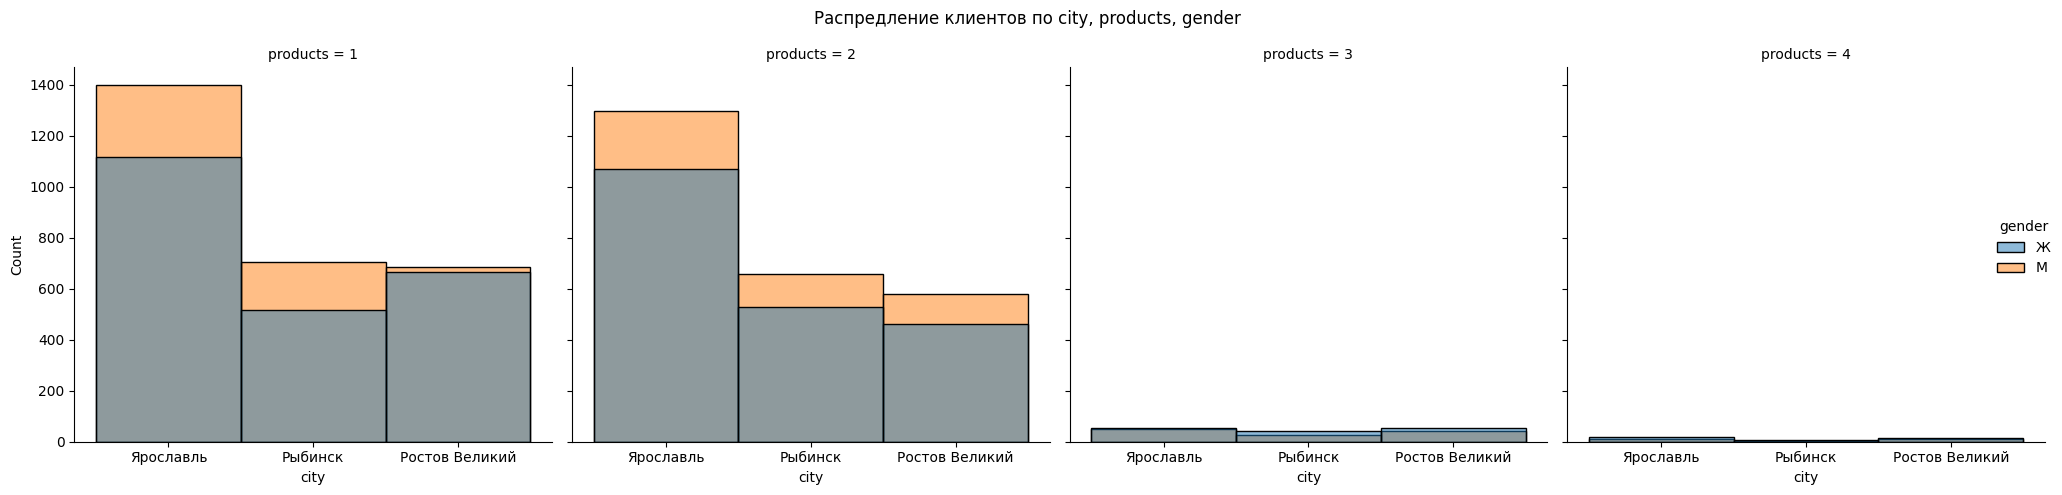

In [64]:
# опредление параметров 2
x = 'city'
y = 'products'
h = 'gender'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

2. - Среди пользователей 3-4 продуктов больше женщин, а среди 1-2 - мужчин;
   - Распределение существенно не меняется в разрезе городов, однако в Ростове для 1 продукта соотношение мужчин и женщин примерно одинаково, хотя в других городах мужчин больше. 

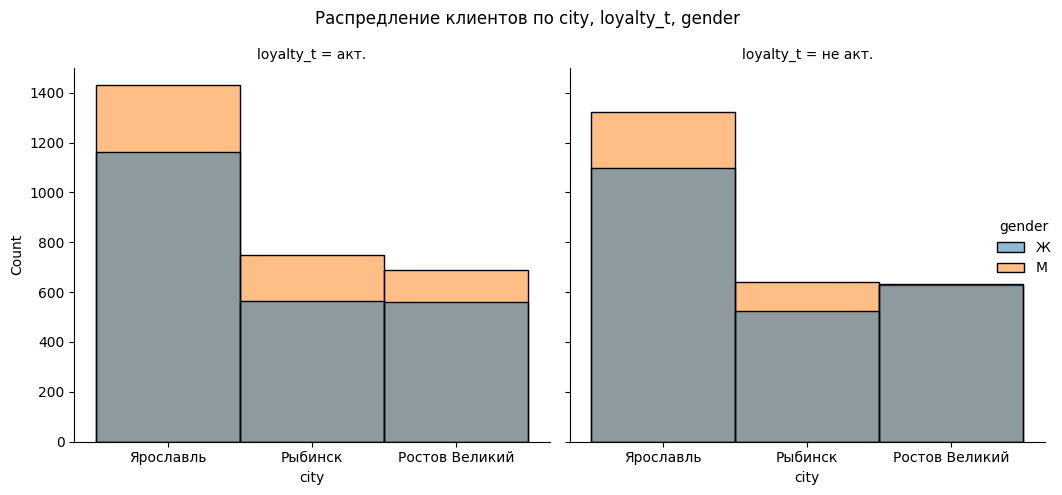

In [65]:
# опредление параметров 3
y = 'loyalty_t'
x = 'city'
h = 'gender'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

3. Отмечается равенство полов в Ростове среди неактивных клиентов. В остальных случаях мужчин больше.

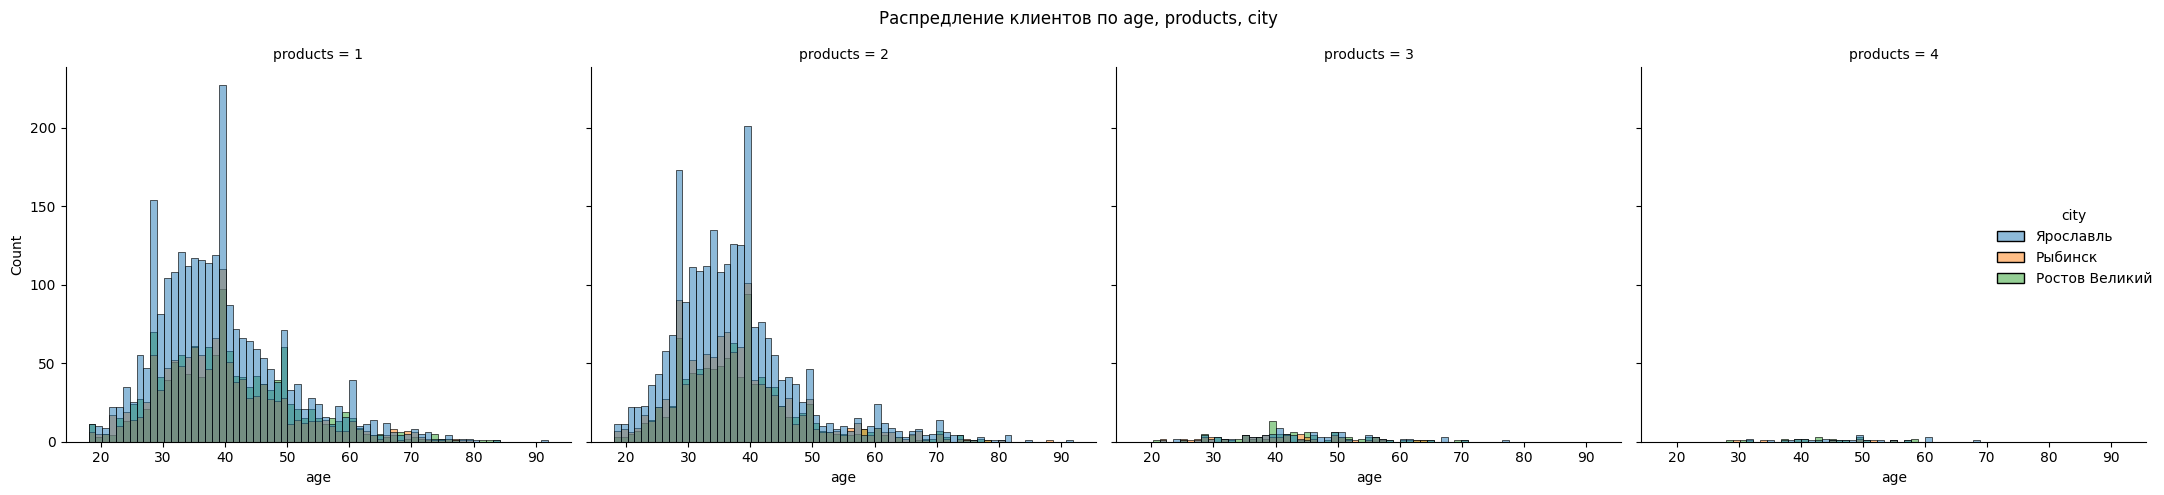

In [66]:
# опредление параметров 4
x = 'age'
y = 'products'
h = 'city'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

4. Распределение по возрасту существенно не различается в разрезе количества продуктов и городов. Примечательно, наличие пиков количества клиентов примерно каждые 10 лет в возрасте 28, 39, 49 и 60 лет и незначительные объемы клиентов с 3 и 4 продуктами. 

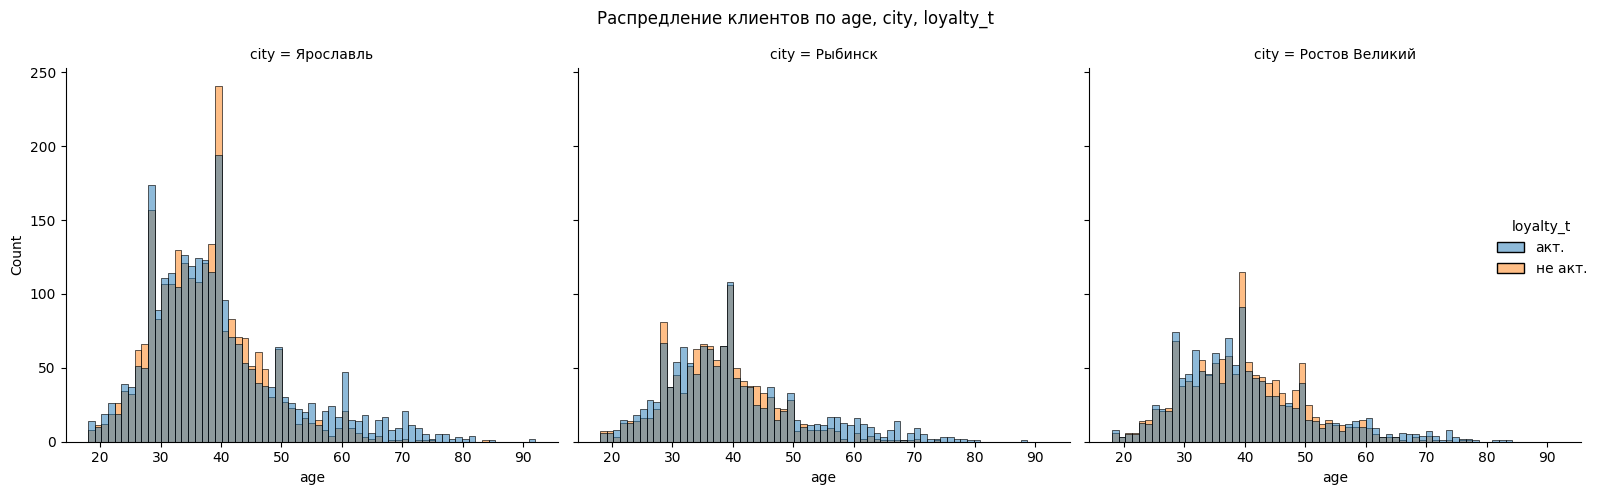

In [67]:
# опредление параметров 5
y = 'city'
x = 'age'
h = 'loyalty_t'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

5. Для Ярославля и Рыбинска характерно стойкое преобладание количества активных клиентов начиная с возраста 55+ лет, в Ростове такая картина обозначается начиная с 60+ лет. 

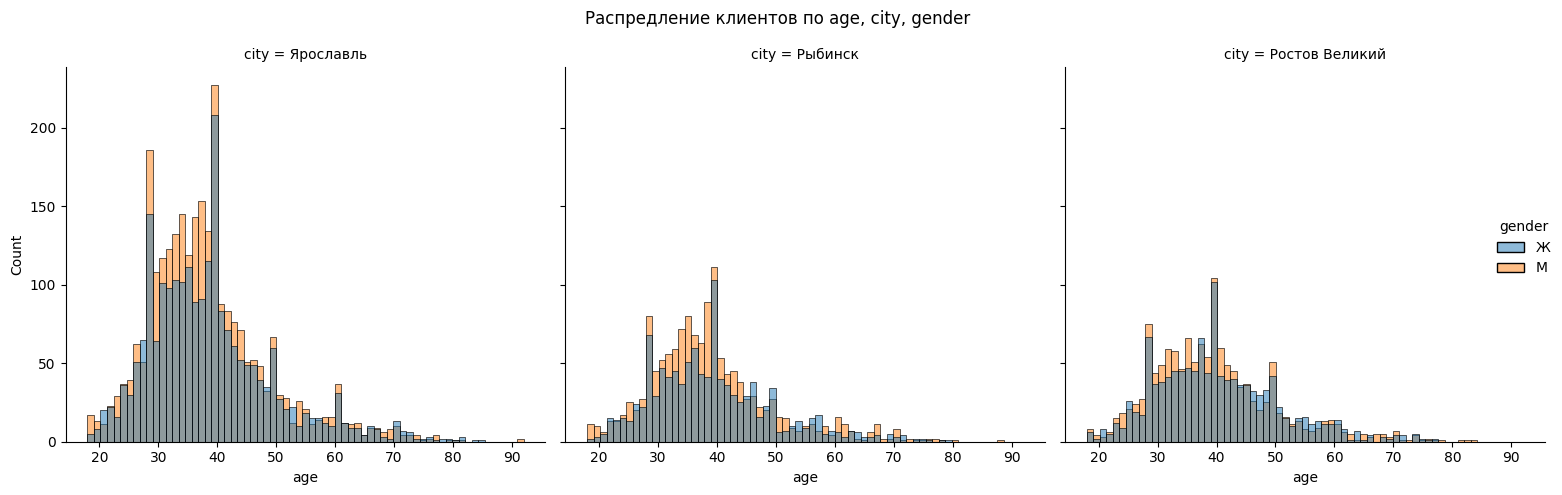

In [68]:
# опредление параметров 6
y = 'city'
x = 'age'
h = 'gender'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

6. Вне зависимости от города наблюдается стойкое преобладание мужчин над женщинами в возрастной категории 28-43 года. Для остальных категорий соотношение примерно одинаково.  

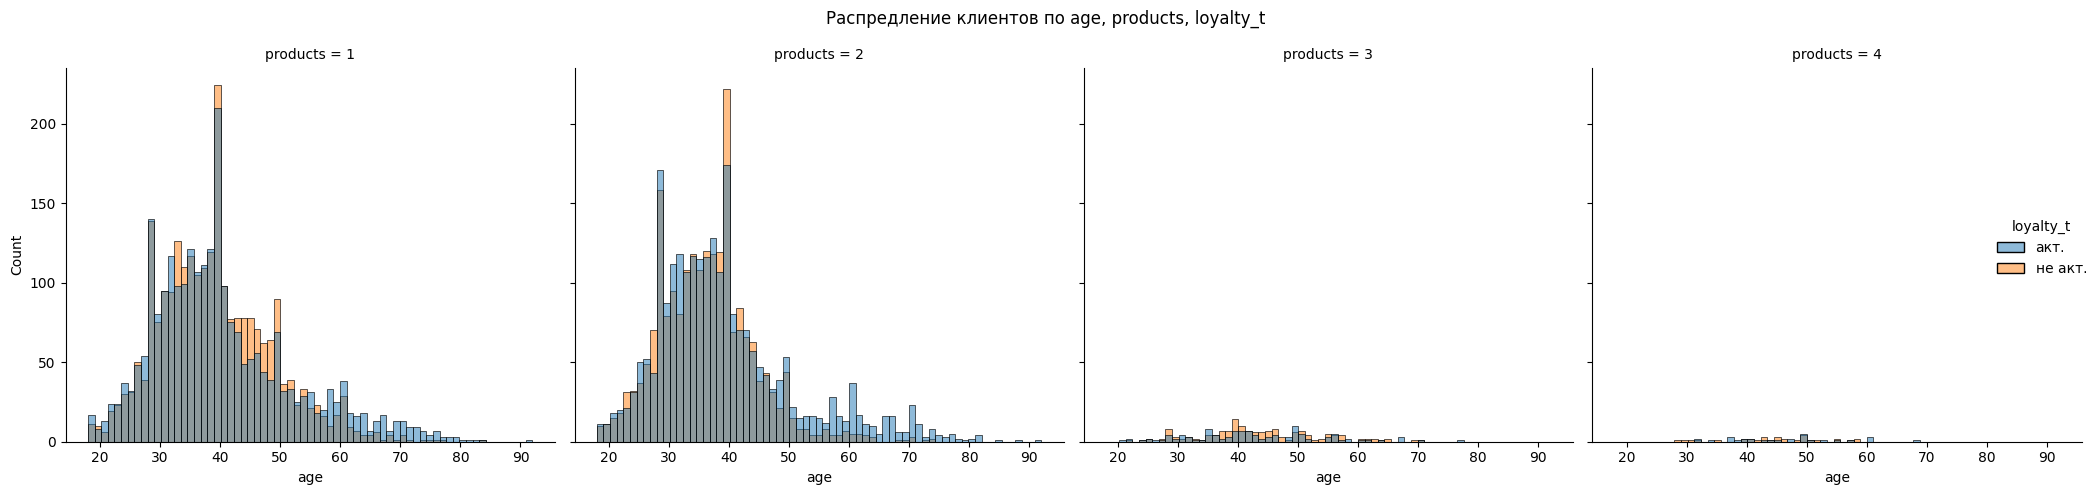

In [69]:
# опредление параметров 7
y = 'products'
x = 'age'
h = 'loyalty_t'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

7. - картина более высокой активности среди старшего поколения, обозначенная в разрезе городов, сохраняется и в разрезе продуктов;
   - среди пользователей 1 продукта ярко выражено преобладание неактивных клиентов в возрасте от 40 до 55 лет.

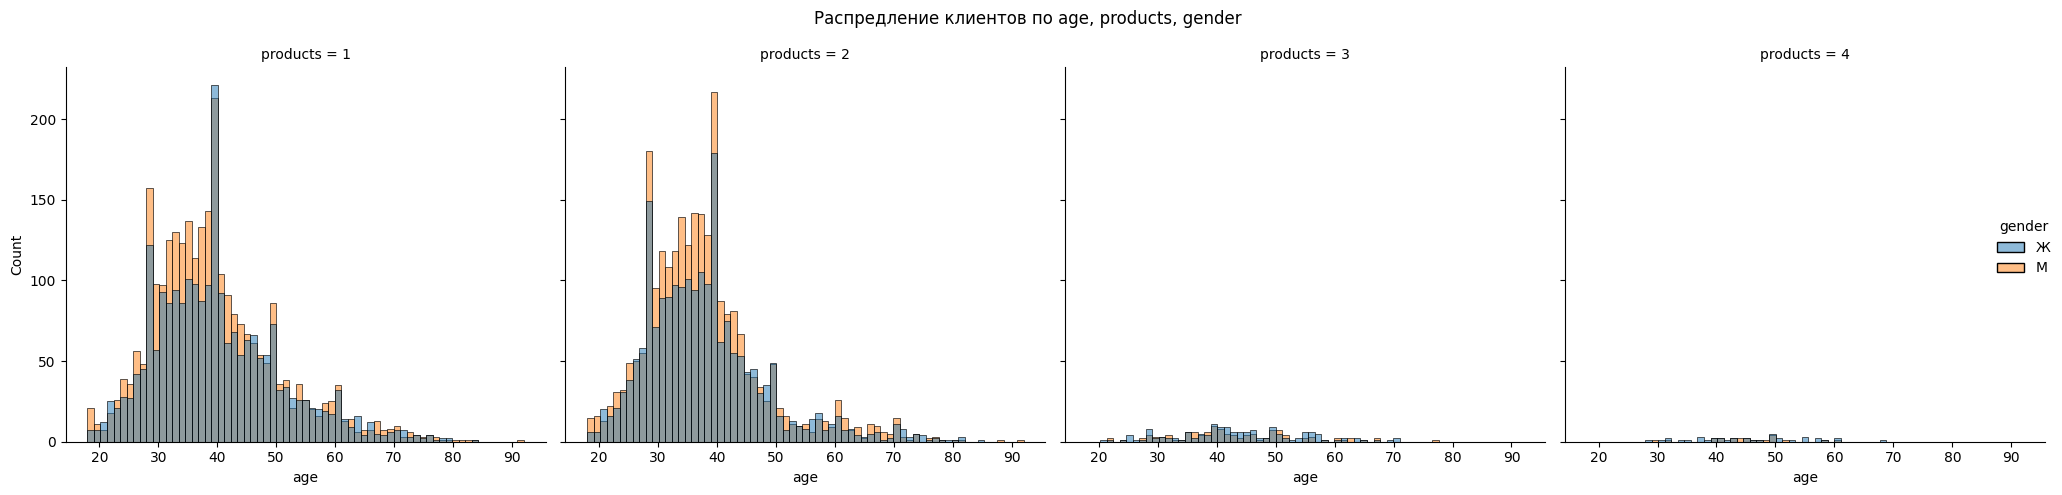

In [70]:
# опредление параметров 8
y = 'products'
x = 'age'
h = 'gender'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

8. Картина стойкого преобладания мужчин над женщинами в возрасте от 28 до 43 лет, обозначенная в разрезе городов, характерна для владельцев 1-2 продуктов.

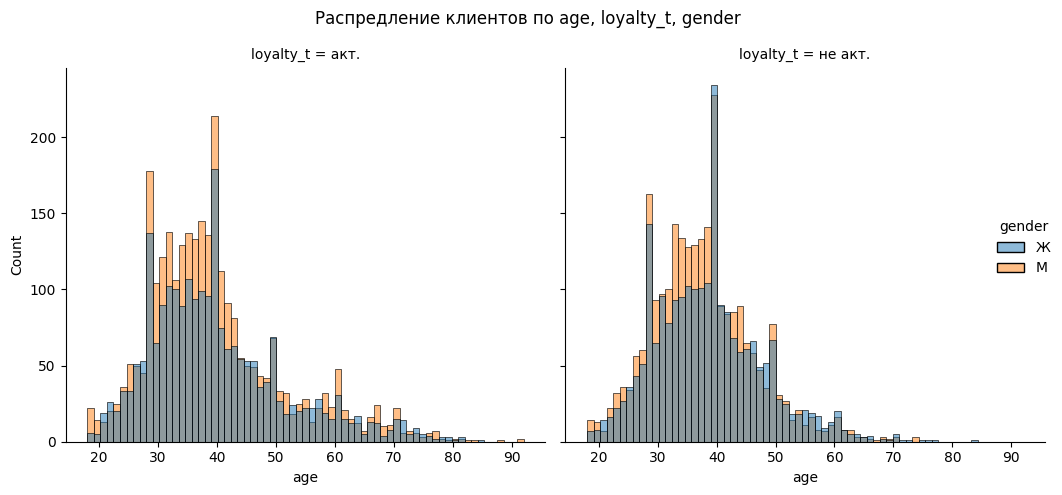

In [71]:
# опредление параметров 9
h = 'gender'
y = 'loyalty_t'
x = 'age'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

9. Отмеченное ранее преобладание мужчин над женщинами в возрасте от 28 до 43 лет подтверждается и в разрезе активности клиентов. Однако среди активных клиентов наблюдается также преобладание мужчин и в категории 50+.

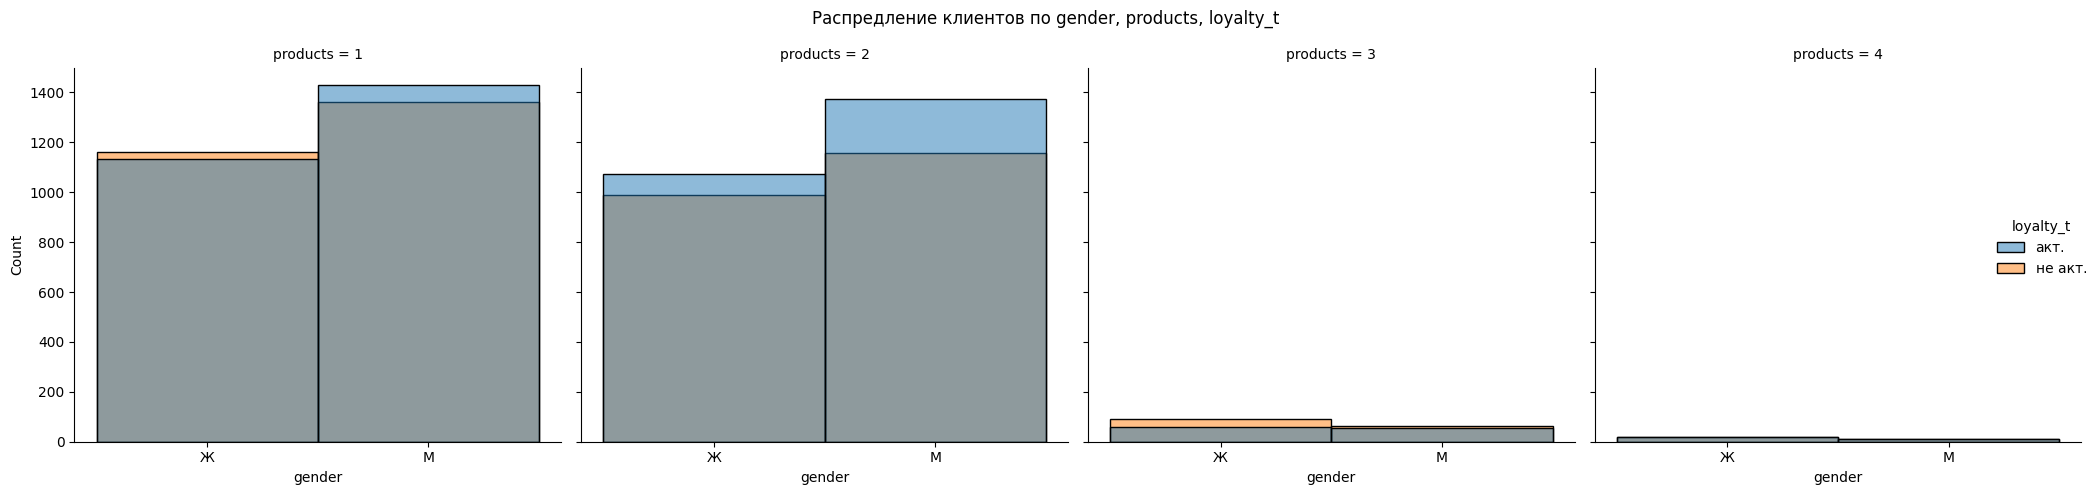

In [72]:
# опредление параметров 10
y = 'products'
h = 'loyalty_t'
x = 'gender'
# построение графика
ax = sns.displot(x=x, col=y, hue=h, data=df)
ax.fig.suptitle('Распредление клиентов по '+x+', '+y+', '+h)
plt.tight_layout();

10. Отмеченное ранее бОльшее количество активных клиентов среди тех, кто имеет 1-2 продукта, не подтверждается среди женщин, имеющих 1 продукт.

Посмотрим на долю оттока в зависимости от связи ключевых показателей между собой. Перед этим для удобства представления и расчетов создадим дополнительные столбец с числовым представлением пола и категоризуем признаки возраста и рейтинга.

In [73]:
# категоризируем возраст, обеспечив представление и убрав лишнюю детализацию, но не очень крупно, чтобы не терять ранее выявленные детали
df['age_cat'] = pd.cut(df['age'], [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, float('inf')],\
                       labels=['0-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55',\
                               '56-60', '61-65', '66-70', '70+'])

In [74]:
# категоризируем возраст, принятая ВОЗ, которая по границам 44, 59 и 75 лет совпадает с основными найденными закономерностями
df['age_who'] = pd.cut(df['age'], [0, 44, 59, 74, 90, float('inf')], labels=['0-44', '45-59', '60-74', '75-90', '90+'])

In [75]:
# категоризируем рейтинг, на основании основных найденных закономерностей
df['score_cat2'] = pd.cut(df['score'], [0, 400, float('inf')], labels=['0-400', '400+'])

In [76]:
# создание столбца с бинарным признаком пола для удобства расчетов
df['gen_num'] = np.where(df['gender']=='М', 1,0)

In [77]:
# доля оттока в разрезе ключевых показателей
df.pivot_table(index='city', columns=['products', 'gender', 'loyalty_t'], values='churn', aggfunc='mean')\
.round(2)\
.style.format('{:.2f}', na_rep='-')\
.background_gradient(cmap = 'Blues', axis=0)

В разрезе городов среди пользователей 1-3 продуктов ярко выражен более высокий отток в Ростове. Среди пользователей 4 продуктов все ушедшие.

In [78]:
# определяем функицю для градации цвета текста по доли оттока
def color_max(value):
    if type(value) == type(''):
        return 'color:black'
    elif value < 0.21: # средний показатель по выборке
        color = 'black' 
        return 'color: {}'.format(color)
    elif value < 0.5: # средний показатель по выборке
        color = 'limegreen' 
        return 'color: {}'.format(color)
    elif value < 0.70:
        color = 'blue' 
        return 'color: {}'.format(color)
    else:
        color = 'red'
        return 'color: {}'.format(color)

In [79]:
# доля ушедших клиентов в зависимости от ключевых показателей
df.query('products<3')\
.pivot_table(index=['age_cat'], columns=['city', 'products', 'gender', 'loyalty_t'], values='churn', aggfunc='mean')\
.round(2)\
.style.format('{:.2f}', na_rep='-').applymap(color_max)

In [80]:
# доля ушедших клиентов в зависимости от ключевых показателей
df.query('products<3')\
.pivot_table(index=['age_who'], columns=['city', 'products', 'gender', 'loyalty_t'], values='churn', aggfunc='mean')\
.round(2)\
.style.format('{:.2f}', na_rep='-').applymap(color_max)

In [81]:
# доля ушедших клиентов в зависимости от ключевых показателей
df.query('products<3')\
.pivot_table(index=['age_cat'], values='churn', aggfunc='mean')\
.round(2).T\
.style.format('{:.2f}', na_rep='-').applymap(color_max)

age_cat,0-20,21-25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,70+
churn,0.06,0.07,0.07,0.08,0.13,0.23,0.43,0.55,0.50,0.37,0.17,0.08


In [82]:
# доля ушедших клиентов в зависимости от ключевых показателей
df.query('products<3')\
.pivot_table(index=['score_cat2'], columns=['city', 'products', 'gender', 'loyalty_t'], values='churn', aggfunc='mean')\
.round(2)\
.style.format('{:.2f}', na_rep='-').applymap(color_max)

Для пользователей 1-2 продуктов в таблице с долей оттока на пересечении ключевых показателей наглядно прослеживается связь поышенного оттока по неактивным клиентам, которая несколько усиливается в случае, если клиент женщина.

In [83]:
# доля активных клиентов в зависимости от ключевых показателей
df.query('products<3')\
.pivot_table(index=['age_cat'], columns=['city', 'products', 'gender'], values='loyalty', aggfunc='mean')\
.round(2)\
.style.format('{:.2f}', na_rep='-').applymap(color_max)

In [84]:
# доля активных клиентов в зависимости от возраста
df.query('products<3')\
.pivot_table(index=['age_cat'], values='loyalty', aggfunc='mean')\
.round(2).T\
.style.format('{:.2f}', na_rep='-').applymap(color_max)

age_cat,0-20,21-25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,70+
loyalty,0.53,0.53,0.51,0.51,0.49,0.48,0.47,0.55,0.65,0.74,0.86,0.91


Для пользователей 1-2 продуктов в таблице с долей активных клиентов на пересечении ключевых показателей наглядно прослеживается увеличение активности с возрастом, при этом возраст повышения активности наступает позже:
- в Ростове, чем в Рыбинске и Ярославле, 
- для пользователей 1 продукта, а не двух.  

In [85]:
# доля активных клиентов в зависимости от пола и возраста
df.query('products<3')\
.pivot_table(index=['age_cat'], columns='gender', values='loyalty', aggfunc='mean')\
.round(2).T\
.style.format('{:.2f}', na_rep='-').applymap(color_max)

age_cat,0-20,21-25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,70+
gender,,,,,,,,,,,,
Ж,0.42,0.53,0.51,0.51,0.47,0.47,0.46,0.52,0.60,0.71,0.82,0.89
М,0.57,0.52,0.50,0.51,0.50,0.49,0.48,0.58,0.70,0.77,0.88,0.92


Среди женщин уровень активности клиентов начиная с 35 лет стабильно ниже.

In [86]:
# определяем функицю для форматирования цвета шрифта при отклонении средней доли от 50% на 5+%
def color_text(value):
    if type(value) == type(''):
        return 'color:black'
    elif value < 0.45:
        color = 'blue' 
        return 'color: {}'.format(color)
    elif value < 0.55:
        color = 'black' 
        return 'color: {}'.format(color)
    else:
        color = 'limegreen'
        return 'color: {}'.format(color)

In [87]:
# доля мужчин в зависимости от ключевых показателей
df.query('products<3')\
.pivot_table(index=['age_cat'], columns=['city', 'products', 'loyalty_t'], values='gen_num', aggfunc='mean')\
.round(2)\
.style.format('{:.2f}', na_rep='-').applymap(color_text)

In [88]:
# доля мужчин в зависимости от возраста
df.query('products<3')\
.pivot_table(index=['age_cat'], values='gen_num', aggfunc='mean')\
.round(2).T\
.style.format('{:.2f}', na_rep='-').applymap(color_text)

age_cat,0-20,21-25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,70+
gen_num,0.71,0.53,0.55,0.57,0.56,0.55,0.50,0.53,0.51,0.54,0.60,0.50


Для пользователей 1-2 продуктов в таблице с долей мужчин (т.к. мужской пол принят за 1, а женский за 0) прослеживается в среднем большая доля женщин в Ростове и сокращение доли мужчин в возрастном диапазоне от 46 до 60 лет, в котором наблюдается повышенная доля оттока. 

***Промежуточный вывод:***
В разрезе обозначенных ключевых показателей, по которым наблюдалась корреляция в предыдущем разделе, отмечены следующие закономерности:
- В возрасте от 28 до 43 лет наблюдается стойкое преобладание мужчин над женщинами среди владельцев 1-2 продуктов;
- В возрасте 50+ наблюдается преобладание мужчин среди активных клиентов;
- В возрасте 55+ по всем продуктам наблюдается преобладание активных клиентов в Ярославле и Рыбинске, а в возрасте 60+ и в Ростове;
- Среди владельцев 1-2 продуктов в целом больше мужчин, кроме Ростова в случае с 1 продуктом;
- В Ростове же отмечается равенстов полов среди неактивных клиентов;
- Среди владельцев 3-4 продуктов больше женщин;
- Среди владельцев 1 продукта больше активных клиентов в Рыбинске и меньше среди женщин;
- Среди владельцев 2 продуктов больше активных клиентов;
- снижение доли Ярославля среди пользователей 3-х продуктов.

***Вывод:***

Корреляционный анализ (коэф-т Пирсона), как и анализ распределения, показали наличие связи ухода пользователей со следующими показателями:
- возраста 0,3 (чем выше возраст, тем вероятнее уход). Медианный возраст ушедших клиентов сильно отличается от оставшихся;
- использование 1-го (0.2), 3-х (0.3) и 4-х (0.2) продуктов увеличивает вероятность ухода. Среди пользователей 1 продукта доля ушедших достигает 25-30%, при этом среди пользователей 3-4 продуктов практически все клиенты ушедшие;
- использование 2-х продуктов (-0.3) снижает вероятность ухода. Остающиеся клиенты чаще всего пользуются двумя продуктами;
- активности -0,2 (с повышением активности, меньше отток). Среди неактивных клиентов доля ушедших выше примерно на 40%;
- город Ростов 0,2 (нахождение в Ростове увеличивает вероятность оттока). В Ростове Великом доля ушедших клиентов практически вдвое превышает аналогичный показатель в других городах;
- женский пол 0.1 (принадлежность к женскому полу увеличивает вероятность оттока). Среди женщин доля ушедших примерно на треть выше, чем среди мужчин;

Коэффициент корреляции Phiko показывает также связь ухода с рейтингом, что подтверждается при анализе распредления, где виден 100% уход при рейтинге < 400.

Помимо связи с уходом матрица корреляции Пирсона также показывает наличие следующих взаимосвязей между показателями:
- пропуски в балансе с нахождением в Ярославле (0.3) или Ростове (-0.4), а также использованием 1 (-0.4) или 2-х (0.4) продуктов, что было подтверждено еще при анализе пропусков;
- количество используемых продуктов с возрастом: использование 2-х продуктов характерно для более молодых групп (-0,1);
- пропуски в балансе с ушедшими клиентами (-0.1). Доля пропусков в данных о балансе среди ушедших существенно ниже, при этом среди ушедших мужчин доля пропусков минимальна.

Коэффициент корреляции Phiko показывает также не выявленную в матрице корреляции Пиросна связь возраста с активностью (0.2).

В целом оба коэффициента корреляции показали практически схожий результат. Можно говорить, что коэффициент корреляции Phiko чуть более чувствителен к отображению взаимосвязей. Также он прост в использовании из-за отсутствия необходимости кодирования данных, но обладает существенным недостатком - не показывает направление связи. Однако спецификой корреляции как инструмента в целом является демонстрация наличия связи, которая при этом не обязательно является причинно-следственной. 

***Анализ портретов клиентов во взаимосвязи ключевых показателей, выявленных при корреляционном анализе, показал, что наиболее значимо на отток влияют только 4 из них:***
- количество продуктов, если оно больше или равно 3, 
- активность;
- пол;
- рейтинг, если он меньше 400.


При этом повышенный отток среди владельцев 1 продукта связан скорее с большей долей женщин начиная с 43 лет, которые в среднем чуть менее активны. Повышенные показатели оттока в возрасте от 45 до 60 также совпадает с более низкими уровнями доли мужчин. А более высокие показатели оттока по Ростову обусловлены:
- более поздним возрастным порогом начал увеличения доли активных клиентов (60 лет против 55 в других городах);
- меньшей долей мужчин среди неактивных клиентов-владельцев 2 продуктов, среди которых отток меньше;
- меньшей долей мужчин среди клиентов-владельцев 1 продукта, для которых повышенный отток в целом тоже не специфичен.

Помимо основного вывода о причинных факторов оттока, в ходе исследовательского анализа данных отмечены также следующие особенности показателей:
- рейтинг: треть клиентов имеют средний рейтинг по классификации НБКИ, 2/3 - высокий. Существенных отклонений в рейтинге в зависимости от пола и города не наблюдается; 
- город: пропорция распределения клиентов по городам не соответствует реальной пропорции численности населения этих городов;
- пол: медианный и средний возраст среди женщин и мужчин не отличается, что не соответствует среднему возрасту населения региона, где женщины живут дольше. В разрезе городов картина схожа;
- баланс: т.к. в Ростове, где пропуски отсутствуют,  разброс значений баланса между 2 и 3 квартилем среди ушедших клиентов меньше, чем в других городах, можно предположить, что среди пропущенных значений больше средне-крупных сумм, отсутствие которых в городах с пропуском увеличило разброс. При этом важно отметить, что медианные значения это не исказило;
- зарплата и объекты в собственности: равномерный характер распределения показателей неправдоподобен и ставит под сомнение его корректность; 
- продукты и активность: нет существенной разницы в распределении между городами и полом;
- наличие кредитной карты: нет существенных особенностей в распределении.

## Проверка статистических гипотез

Для проверки гипотез будет использована проверка равенстве средних двух независимых генеральных совокупностей, т.к. сравнение производится между двумя независимыми выборками, а не с конкретным числом. 

### Гипотеза о равенстве среднего дохода между теми клиентами, которые ушли и теми, которые остались

- H_0: Средний доход ушедших клиентов  = среднему доходу оставшихся клиентов.
- H_1: Средний доход ушедших клиентов  != среднему доходу оставшихся клиентов.
- Пороговое значение для p-value устанавливается = 1%, т.к. есть больше уверенности в истинности нулевой гипотезы, поэтому снижаем вероятность допустить ошибку первого рода на более высоком уровне. 

In [89]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df[df['churn']==1]['estimated_salary'],
    df[df['churn']==0]['estimated_salary'],
    equal_var=False) # указываем False, т.к. выборки не равны
alpha = .05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.22892461305145803
Не получилось отвергнуть нулевую гипотезу


***Промежуточный вывод:*** Вероятность того, что случайно будет получено наблюдаемое различие, составляет 22%. Это много и не позволяет отвергнуть нулевую гипотезу о равенстве средней заработной платы.

### Гипотеза о равенстве среднего количества используемых продуктов между ушедшими и оставшимися клиентами (возможна корректировка в ходе дальнейшего анализа)

- H_0: Среднее количество продуктов у ушедших клиентов  = среднему количеству продуктов у оставшихся клиентов.
- H_1: Среднее количество продуктов у ушедших клиентов  != среднему количеству продуктов у оставшихся клиентов.
- Пороговое значение для p-value устанавливается = 5%, т.к. есть больше уверенности в истинности альтернативной гипотезы, поэтому принимаем вероятность допустить ошибку первого рода на более высоком уровне. 

In [90]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df[df['churn']==1]['products'],
    df[df['churn']==0]['products'],
    equal_var=False) # указываем False, т.к. выборки не равны
alpha = .05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.00021858494460549394
Отвергаем нулевую гипотезу


***Промежуточный вывод:*** Вероятность того, что случайно будет получено наблюдаемое различие крайне мала, это позволяет отвергнуть нулевую гипотезу о равенстве среднего количества продуктов.

***Вывод:*** 

- Нулевая гипотеза о равенстве дохода не отвергнута - средний доход среди уходящих и остающихся равен;
- Нулевая гипотеза о равенстве среднего количества продуктов отвергнута - количество продуктов среди уходящих и остающихся не равно.

## Сегментация пользователей

В ходе исследовательского анализа данных были выделены 4 основных фактора, влияющих на уход клиентов:
- количество продуктов более или равное 3;
- неактивность;
- женский пол;
- рейтинг, если он меньше 400

А также 2, усиливающих отток опосредовано из-за комбинации основных факторов:
- возраст 45-75 лет;
- город Ростов. 

Выделим несколько сегментов, наиболее склонных к уходу, но перед этим оценим средневзвешенную величину уходящих клиентов в разрезе ключевых влияющих признаков.

In [91]:
# доля уходящих
df_churn = df.query('products<3')\
    .pivot_table(index=['age_who'], columns=['city', 'products', 'gender', 'loyalty_t'], values='churn', aggfunc='mean')

In [92]:
# вес признака
df_share = df.query('products<3')\
    .pivot_table(index=['age_who'], columns=['city', 'products', 'gender', 'loyalty_t'], values='userid', aggfunc='count')\
    /df.query('products<3')['userid'].count()

In [93]:
# определяем функицю для градации цвета текста по доли оттока
def color_max2(value):
    if type(value) == type(''):
        return 'color:black'
    elif value < 0.05:
        color = 'black' 
        return 'color: {}'.format(color)
    elif value < 0.1:
        color = 'limegreen' 
        return 'color: {}'.format(color)
    elif value < 0.5:
        color = 'blue' 
        return 'color: {}'.format(color)
    else:
        color = 'red'
        return 'color: {}'.format(color)

In [94]:
# средневзвешенный отток
df_w_avg  = df_churn.mul(df_share, fill_value=0)*100
df_w_avg['Total'] = df_w_avg.iloc[:, 0:].sum(axis=1)
df_w_avg = df_w_avg.style.format('{:.1f}%', na_rep='-').applymap(color_max2)
df_w_avg

In [95]:
# доля ушедших клиентов в зависимости от ключевых показателей
df.query('products<3')\
.pivot_table(index=['age_who'], columns=['city', 'products', 'gender', 'loyalty_t'], values='churn', aggfunc='mean')\
.round(2)\
.style.format('{:.2f}', na_rep='-').applymap(color_max)

In [96]:
print('Процент оттока по выборке: ', f"{df['churn'].mean():.1%}")

Процент оттока по выборке:  20.4%


Анализ средневзвешенного оттока показал, что большая часть оттока сформирована за счет клиентов в возрасте до 45 лет. И хотя доля оттока по ним существенно меньше, чем по более возрастным клиентам, однако численно эта группа значительна и ее не стоит игнорировать. Наибольший средневзвешенный отток в этой группе характерен для неактивных пользователей 1 продукта в Ростове и Ярославле. Выделим его в отдельный сегмент из-за степени влияния на общий показатель оттока. Опишем основные сегменты.

- Сегмент 1: неактивных пользователи 1 продукта в Ростове и Ярославле;
- Сегмент 2: Ростов, 1 продукт, неактивные, 45-65 лет;
- Сегмент 3: Ростов, женщины, неактивные, 50+;
- Сегмент 4: Ростов, не активные клиенты, 50+;
- Сегмент 5: возраст 55+, не активные, женщины;
- Сегмент 6: 3-4 продукта, не активные клиенты;
- Сегмент 7: пользователи с рейтингом менее 400;
- Сегмент 8: возраст 55+, не активные, женщины.

In [97]:
# датасеты с отбором сегментов
df_s1 = df.query('products == 1 and loyalty == 0 and (city == "Ярославль" or city == "Ростов Великий")')
df_s2 = df.query('city == "Ростов Великий" and products == 1 and loyalty == 0 and (age >= 45 and age <=65)')
df_s3 = df.query('city == "Ростов Великий" and gender == "Ж" and loyalty == 0 and age >= 50')
df_s4 = df.query('city == "Ростов Великий" and loyalty == 0 and age >= 50')
df_s5 = df.query('age >= 50 and loyalty == 0 and gender == "Ж"')
df_s6 = df.query('products >= 3')
df_s7 = df.query('score <= 400')
df_s8 = df.query('age >= 45 and loyalty == 0 and gender == "Ж"')

In [98]:
# информация о доле оттока и удельному весу в клиенской базе по выделенным сегментам
list = [df_s1, df_s2, df_s3,  df_s4, df_s5, df_s6, df_s7, df_s8]
for item in enumerate(list):
    print('Процент оттока в сегменте', item[0]+1, '=', f"{item[1]['churn'].mean():.1%}",\
          ', что в', f"{(item[1]['churn'].mean()/df['churn'].mean()-1):.1f}", 'раза больше среднего', '\n'\
         'Удельный вес в выборке:', f"{(item[1]['userid'].count()/10000):.1%}", '\n')
    

Процент оттока в сегменте 1 = 37.8% , что в 0.9 раза больше среднего 
Удельный вес в выборке: 19.7% 

Процент оттока в сегменте 2 = 86.8% , что в 3.3 раза больше среднего 
Удельный вес в выборке: 2.3% 

Процент оттока в сегменте 3 = 87.4% , что в 3.3 раза больше среднего 
Удельный вес в выборке: 0.9% 

Процент оттока в сегменте 4 = 85.7% , что в 3.2 раза больше среднего 
Удельный вес в выборке: 1.8% 

Процент оттока в сегменте 5 = 86.3% , что в 3.2 раза больше среднего 
Удельный вес в выборке: 2.5% 

Процент оттока в сегменте 6 = 85.9% , что в 3.2 раза больше среднего 
Удельный вес в выборке: 3.3% 

Процент оттока в сегменте 7 = 100.0% , что в 3.9 раза больше среднего 
Удельный вес в выборке: 0.2% 

Процент оттока в сегменте 8 = 72.6% , что в 2.6 раза больше среднего 
Удельный вес в выборке: 5.2% 



***Вывод:*** выделено 8 сегментов, различающихся по проценту оттока и влиянию на количество отточных клиентов в банке:

- Самый массовые сегмент (20% выборки с 38% ушедших клиентов) - Сегмент 1: неактивных пользователи 1 продукта в Ростове и Ярославле;
- Второй по величине сегмент (5% выборки с 73% оттока) - Сегмент 8: возраст 55+, не активные, женщины.

Сегменты с долей оттока > 80%:
- Сегмент 2 (87% оттока ~2% выборки): Ростов, 1 продукт, неактивные, 45-65 лет;
- Сегмент 3 (87% оттока ~1% выборки): Ростов, женщины, неактивные, 50+;
- Сегмент 4 (86% оттока ~2% выборки): Ростов, не активные клиенты, 50+;
- Сегмент 5 (86% оттока ~3% выборки): возраст 55+, не активные, женщины;
- Сегмент 6 (86% оттока ~3% выборки): 3-4 продукта, не активные клиенты
- Сегмент 7 (100% оттока 0.2% выборки): пользователи с рейтингом менее 400


## Общий вывод и рекомендации

Исходные параметры датафрейма:
 
- Исходный датасет состоит из 10000 строк с уникальными id клиентов из Ярославля, Рыбинска и Ростова Великого и 12 колонок, содержащих информацию о социально-географических характеристиках клиентов, их финансовом положении и характере взаимоотношений с банком;
- 48% клиентов не активны;
- 97% пользуются 1 продуктом;
- 55% клиентов мужчины и 45% женщины;
- 20% уже покинули банк;
- в данных отсутствуют дубликаты и существенные выбросы, однако аномально равномерный характер распределения данных о количестве объектов, оцениваемой заработной плате и 36% доля пропусков в данных о балансе делает информацию о финансовом положении мало пригодной для анализа. 

В ходе исследовательского анализа данных были выделены 4 основные показатели, влияющие на отток клиентов:
- количество продуктов, если оно больше или равно 3, доля оттока = 86%, а среди пользователей 4 продуктов показатель = 100%. 
- активность - с уменьшением активности растет доля оттока. Среди неактивных клиентов доля ушедших выше примерно на 40%;
- женский пол, для которого характерен больший отток. Среди женщин доля ушедших примерно на треть выше, чем среди мужчин;
- рейтинг, если он меньше 400. среди таких пользователей отток = 100%.
    
Усиление и пересечение этих факторов в разрезе иных признаков выделяет их также как особо отточные, среди них: 
- владельцы 1 продукта, где больше долей женщин начиная с 43 лет, которые в среднем чуть менее активны; 
- возрасте от 45 до 60 совпадает с более низкими уровнями доли мужчин; 
- нахождение в Ростове, для которого характерны:
    - более поздний возраст начал увеличения доли активных клиентов, после провала в среднем возрасте (60 лет против 55 в других городах);
    - меньшая долей мужчин среди неактивных клиентов-владельцев 2 продуктов, которым при иных обстоятельствах свойственен меньший отток;
    - меньшая доля мужчин среди клиентов-владельцев 1 продукта, для которых повышенный отток в целом тоже не специфичен.    
 
Проверка статистических гипотез, которая из-за малых объемов выборки, не играла большой роли показала отсутствие различий в среднем доходе между ушедшими и остающимися клиентами и наличие разницы между ними в среднем количестве используемых продуктов. 

По итогам анализа выделено 8 сегментов, различающихся по проценту оттока и влиянию на количество отточных клиентов в банке:
- Самый массовые сегмент (20% выборки с 38% ушедших клиентов) - Сегмент 1: неактивных пользователи 1 продукта в Ростове и Ярославле;
- Второй по величине сегмент (5% выборки с 73% оттока) - Сегмент 8: возраст 55+, не активные, женщины.

Сегменты с долей оттока > 80%:
- Сегмент 2 (87% оттока ~2% выборки): Ростов, 1 продукт, неактивные, 45-65 лет;
- Сегмент 3 (87% оттока ~1% выборки): Ростов, женщины, неактивные, 50+;
- Сегмент 4 (86% оттока ~2% выборки): Ростов, не активные клиенты, 50+;
- Сегмент 5 (86% оттока ~3% выборки): возраст 55+, не активные, женщины;
- Сегмент 6 (86% оттока ~3% выборки): 3-4 продукта, не активные клиенты;
- Сегмент 7 (100% оттока 0.2% выборки): пользователи с рейтингом менее 400.

С целью сокращения оттока клиентов рекомендуется:
- дополнительно исследовать причину оттока клиентов с количеством продуктов больше или равным 3, интервьюировать клиентов, например, или использовать внутреннюю информацию банка. Возможно, увеличение количества продуктов негативно сказывается на стабильности работы банковского приложения, либо качество обслуживания какого-то из продуктов, обычно не являющимся продуктом первого или самого популярного выборов влияет на общее впечатление клиентов от банка и склоняет их к отказу от всех продуктов. Это позволит решить проблему в сегменте №6 и повлияет на 3% клиентов.
- разработать маркетинговое предложение, например в виде отдельного продукта, для неактивных клиентов в Ростове и Ярославле, пользующихся 1 продуктом. Это позволит охватить самый массовый 1-ый сегмент и 20% клиентов. Эти в среднем более молодой клиент, который вероятно пользуется кредитной картой (таких клиентов 70% от всех). Возможно ставки по кредитам выше рыночных или на рынке есть более интересные кэшбэковые предложения;
- выяснить причину оттока лиц в диапазоне 45-60 лет: насколько удобно им пользоваться услугами банка (интерфейс приложения, порядок обслуживания и удаленность офисов, наличие пенсионных программ и предложений). Можно протестировать догадки в Ростове, где отток выражен наиболее ярко, и если они подтвердятся, распространить предложения на все города. Это позволит охватить сегменты № 2, 3, 4, 5, 8, что суммарно покроет до 13% клиентов;
- разработать специальное маркетинговое предложение для неактивных женщин 55+: это может быть отдельный продукт, акция или даже повышающая лояльность рассылка поздравлений к основным праздникам, содержащая напоминание об уже существующих интересных предложениях. Для этой категории как раз свойственна склонность к таким знакам внимания. Это затронет сегменты №8 (5% выборки), 3(1%);
- проанализировать особенности работы с клиентами, рейтинг которых ниже 400: интересны ли они банку и если да, в какой области банк готов к взаимодействию с ними и что сейчас приводит к их уходу. Возможно политика банка в отношении низкорейтинговых клиентов ограничивает последних в возможности пользоваться услугами банка, при этом на открытом рынке для них есть интересные предложения. Это сохранит 0,2% клиентов (сегмент №7).